In [ ]:
import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
url = 'https://github.com/nganlam-vn/Nhom7_PTDL_MiniProject/blob/master/tk_t12_2022.xlsx?raw=true'
response = requests.get(url)

df = pd.read_excel(io.BytesIO(response.content))
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,SĐT người tạo đơn,Người tạo đơn,Siêu thị,Khu vực,Mã chuyến,Ngày tạo đơn,Mã đơn hàng,Giá trị đơn hàng,Địa chỉ lấy hàng,Địa chỉ khách,...,Phí chuyến cho tài,Tổng phí trả tài xế,Thời điểm tạo đơn,Thời điểm tài xế nhận đơn,Thời điểm tài xế lấy hàng,Thời gian hoàn thành đơn,pod,por,tracking_link,sdt_khach
0,84937806040,Trần Phương,CM Rạch Miễu,HCM2,225HEK23-1,2022-12-31,6/76752-20/56816,3043815,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...","102/39 Thích Quảng Đức, Phường 05, Phú Nhuận, ...",...,8000,24000.0,2022-12-31 20:30:30,2022-12-31 20:31:29,2022-12-31 20:32:20,2022-12-31 21:01:23,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/225HEK23...,0909533733
1,84937806040,Trần Phương,CM Rạch Miễu,HCM2,22Y23RIL-1,2022-12-31,16/51345-17/39050,1100954,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...","206 Hoa Lan, Phường 02, Phú Nhuận, Hồ Chí Minh...",...,8000,12000.0,2022-12-31 20:30:30,2022-12-31 20:32:45,2022-12-31 20:33:26,2022-12-31 20:41:13,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/22Y23RIL...,NaN
2,84937806040,Trần Phương,CM Rạch Miễu,HCM2,2264FD2X-1,2022-12-31,10/81774,4060000,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...","414 Trường Sa, Phường 02, Phú Nhuận, Hồ Chí Mi...",...,8000,40000.0,2022-12-31 19:42:48,2022-12-31 19:43:03,2022-12-31 19:44:25,2022-12-31 20:17:00,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/2264FD2X...,0904437818
3,84937806040,Trần Phương,CM Rạch Miễu,HCM2,22RLJNFA-1,2022-12-31,16/51248-17/38864,1088500,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...","270/88 (Số Cũ 270/282) Đường Phan Đình Phùng, ...",...,8000,12000.0,2022-12-31 18:35:23,2022-12-31 18:35:36,2022-12-31 20:25:40,2022-12-31 21:01:00,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/22RLJNFA...,0909312712
4,84937806040,Trần Phương,CM Rạch Miễu,HCM2,22DTMSO4-1,2022-12-31,17/39003-4/69709,1131910,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...","12/2D Cù Lao, Phường 02, Phú Nhuận, Hồ Chí Min...",...,8000,20000.0,2022-12-31 18:35:23,2022-12-31 18:35:36,2022-12-31 20:25:19,2022-12-31 20:59:59,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/22DTMSO4...,0837373712


- **SĐT người tạo đơn**            : (Thường là nhân viên, cửa hàng).
- **Người tạo đơn**                : Tên nhân viên.
- **Siêu thị**                     : Tên siêu thị/cửa hàng.
- **Khu vực**                      : Khu vực địa lý mà đơn hàng thuộc về.
- **Mã chuyến**                    : Mã chuyến giao hàng.
- **Ngày tạo đơn**                  : Ngày mà đơn hàng được tạo.
- **Mã đơn hàng**                  : ID đơn hàng cụ thể.
- **Giá trị đơn hàng**             : Giá trị tiền hàng trong đơn.
- **Địa chỉ lấy hàng**             : Địa điểm lấy hàng.
- **Địa chỉ khách**                : Địa chỉ giao đến khách hàng.
- **Địa chỉ chi tiết**             : Ghi rõ hơn về địa chỉ khách.
- **Ghi chú**                      : Các lưu ý đặc biệt cho đơn hàng.
- **Tài xế**                       : Tên tài xế nhận giao đơn.
- **SĐT**                          : Số điện thoại của tài xế.
- **km đơn**                       : Số km vận chuyển của đơn hàng.
- **km chuyến**                    : Số km của toàn chuyến xe.
- **Mã dịch vụ**                   : Mã loại dịch vụ giao hàng.
- **trạng_thái_đơn**               : Trạng thái hiện tại của đơn (ví dụ: đã giao, hủy, thất bại...).
- **trang_thai_chuyến**            : Trạng thái chuyến xe (ví dụ: đang giao, đã hoàn tất, hủy chuyến...).
- **ly_do_huy**                    : Lý do hủy đơn hoặc chuyến nếu có.
- **Đơn ưu tiên**                  : Đơn hàng ưu tiên (có thể được giao nhanh hơn đơn thường).
- **Hạng thành viên**              : Hạng của khách hàng (ví dụ: đồng, bạc, vàng, kim cương).
- **Phí vượt km**                  : Phụ phí tính thêm nếu quãng đường vượt tiêu chuẩn dịch vụ.
- **Phụ phí thu khách**            : Các phụ phí khách hàng cần trả thêm.
- **Mô tả phụ phí KH**             : Mô tả chi tiết phụ phí thu từ khách hàng.
- **Tổng phí thu khách**           : Tổng phí khách phải trả (phụ phí).
- **Thu hộ COD**                   : Tiền hàng cần thu hộ (Cash On Delivery).
- **Tổng thu khách hàng**          : Tổng số tiền tài xế thu từ khách (COD + phụ phí).
- **Phụ phí trả tài xế**           : Phụ phí công ty trả thêm cho tài xế.
- **Mô tả phụ phí TX**             : Mô tả chi tiết phụ phí trả tài xế.
- **Số chuyến**                    : Số lượng chuyến xe.
- **Đơn giá chuyến**               : Giá tiền của một chuyến xe.
- **Phí chuyến cho tài**           : Phí chuyến trả cho tài xế.
- **Tổng phí trả tài xế**          : Tổng số tiền tài xế nhận được.
- **Thời điểm tạo đơn**            : Thời điểm tạo đơn (ngày giờ).
- **Thời điểm tài xế nhận đơn**    : Thời điểm tài xế nhận đơn giao.
- **Thời điểm tài xế lấy hàng**    : Thời điểm tài xế lấy hàng thành công.
- **Thời gian hoàn thành đơn**     : Thời gian đơn hàng giao thành công.
- **pod**                          : Proof of Delivery - bằng chứng giao hàng.
- **por**                          : Proof of Return - bằng chứng trả hàng (nếu có).
- **tracking_link**                : Link theo dõi đơn hàng online.
- **sdt_khach**                    : Số điện thoại khách hàng.


In [ ]:
# Hiển thị số dòng và số cột
print(f"Số dòng: {df.shape[0]}, Số cột: {df.shape[1]}")
# Kiểm tra số dòng, số cột, kiểu dữ liệu từng cột
df.info()

Số dòng: 97170, Số cột: 42
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97170 entries, 0 to 97169
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SĐT người tạo đơn          97170 non-null  int64  
 1   Người tạo đơn              97170 non-null  object 
 2   Siêu thị                   97170 non-null  object 
 3   Khu vực                    97170 non-null  object 
 4   Mã chuyến                  97170 non-null  object 
 5   Ngày tạo đơn               97170 non-null  object 
 6   Mã đơn hàng                97169 non-null  object 
 7   Giá trị đơn hàng           97170 non-null  int64  
 8   Địa chỉ lấy hàng           97170 non-null  object 
 9   Địa chỉ khách              97170 non-null  object 
 10  Địa chỉ chi tiết           1640 non-null   object 
 11  Ghi chú                    12708 non-null  object 
 12  Tài xế                     96665 non-null  object 
 13  SĐT                

# **1. Tiền xử lý dữ liệu**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
SĐT người tạo đơn,0
Người tạo đơn,0
Siêu thị,0
Khu vực,0
Mã chuyến,0
Ngày tạo đơn,0
Mã đơn hàng,1
Giá trị đơn hàng,0
Địa chỉ lấy hàng,0
Địa chỉ khách,0


**Mô tả thống kê tổng quan cho bộ dữ  liệu**

In [ ]:
df.describe()

,SĐT người tạo đơn,Giá trị đơn hàng,SĐT,km đơn,km chuyến,Phí vượt km,Phụ phí thu khách,Tổng phí thu khách,Thu hộ COD,Tổng thu khách hàng,Phụ phí trả tài xế,Số chuyến,Đơn giá chuyến,Phí chuyến cho tài,Tổng phí trả tài xế
count,9.717000e+04,9.717000e+04,9.666500e+04,97165.000000,97170.000000,97170.0,97170.000000,97170.000000,9.717000e+04,9.717000e+04,9.717000e+04,97170.000000,97170.000000,9.717000e+04,9.717000e+04
mean,8.486390e+10,4.913961e+08,8.483415e+10,2.623140,2.612549,0.0,30.909746,30.909746,2.144978e+05,2.145287e+05,1.068790e+04,1.075178,8022.584131,8.598153e+03,1.928605e+04
std,1.519650e+08,1.516192e+11,1.685211e+08,16.202207,16.204246,0.0,1354.996010,1354.996010,1.062919e+06,1.062939e+06,2.001926e+04,3.231455,952.456816,2.676203e+04,3.390557e+04
min,8.432703e+10,0.000000e+00,8.432754e+10,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8.490265e+10,6.218422e+05,8.478943e+10,0.960000,0.940000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,7500.000000,7.500000e+03,8.000000e+03
50%,8.490909e+10,1.152000e+06,8.490713e+10,1.780000,1.770000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,7.500000e+03,1.000000,8000.000000,8.000000e+03,1.500000e+04
75%,8.493263e+10,2.019400e+06,8.492522e+10,3.190000,3.180000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1.400000e+04,1.000000,8000.000000,8.500000e+03,2.250000e+04
max,8.498884e+10,4.726221e+13,8.498962e+10,2096.780000,2096.760000,0.0,217000.000000,217000.000000,1.189810e+08,1.189810e+08,1.020000e+06,420.000000,11000.000000,3.498000e+06,3.498000e+06


In [ ]:
#df.drop(columns=['Địa chỉ chi tiết','Ghi chú','Mô tả phụ phí KH','pod','por'], inplace=True)

In [ ]:
date_cols = ['Ngày tạo đơn', 'Thời điểm tạo đơn', 'Thời điểm tài xế nhận đơn', 'Thời điểm tài xế lấy hàng', 'Thời gian hoàn thành đơn']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


df['Thu hộ COD'].replace({'Có': 1, 'Không': 0}, inplace=True)
df['Đơn ưu tiên'].replace({'Có': 1, 'Không': 0}, inplace=True)

<ipython-input-90-a4f390dea049>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Thu hộ COD'].replace({'Có': 1, 'Không': 0}, inplace=True)
<ipython-input-90-a4f390dea049>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

<ipython-input-91-3eedc915ce67>:12: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo không bị chồng lấn
<ipython-input-91-3eedc915ce67>:12: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo không bị chồng lấn
<ipython-input-91-3eedc915ce67>:12: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo không bị chồng lấn
<ipython-input-91-3eedc915ce67>:12: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo không bị chồng lấn
<ipython-input-91-3eedc915ce67>:12: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo không bị chồng lấn
<ipython-input-91-3eedc

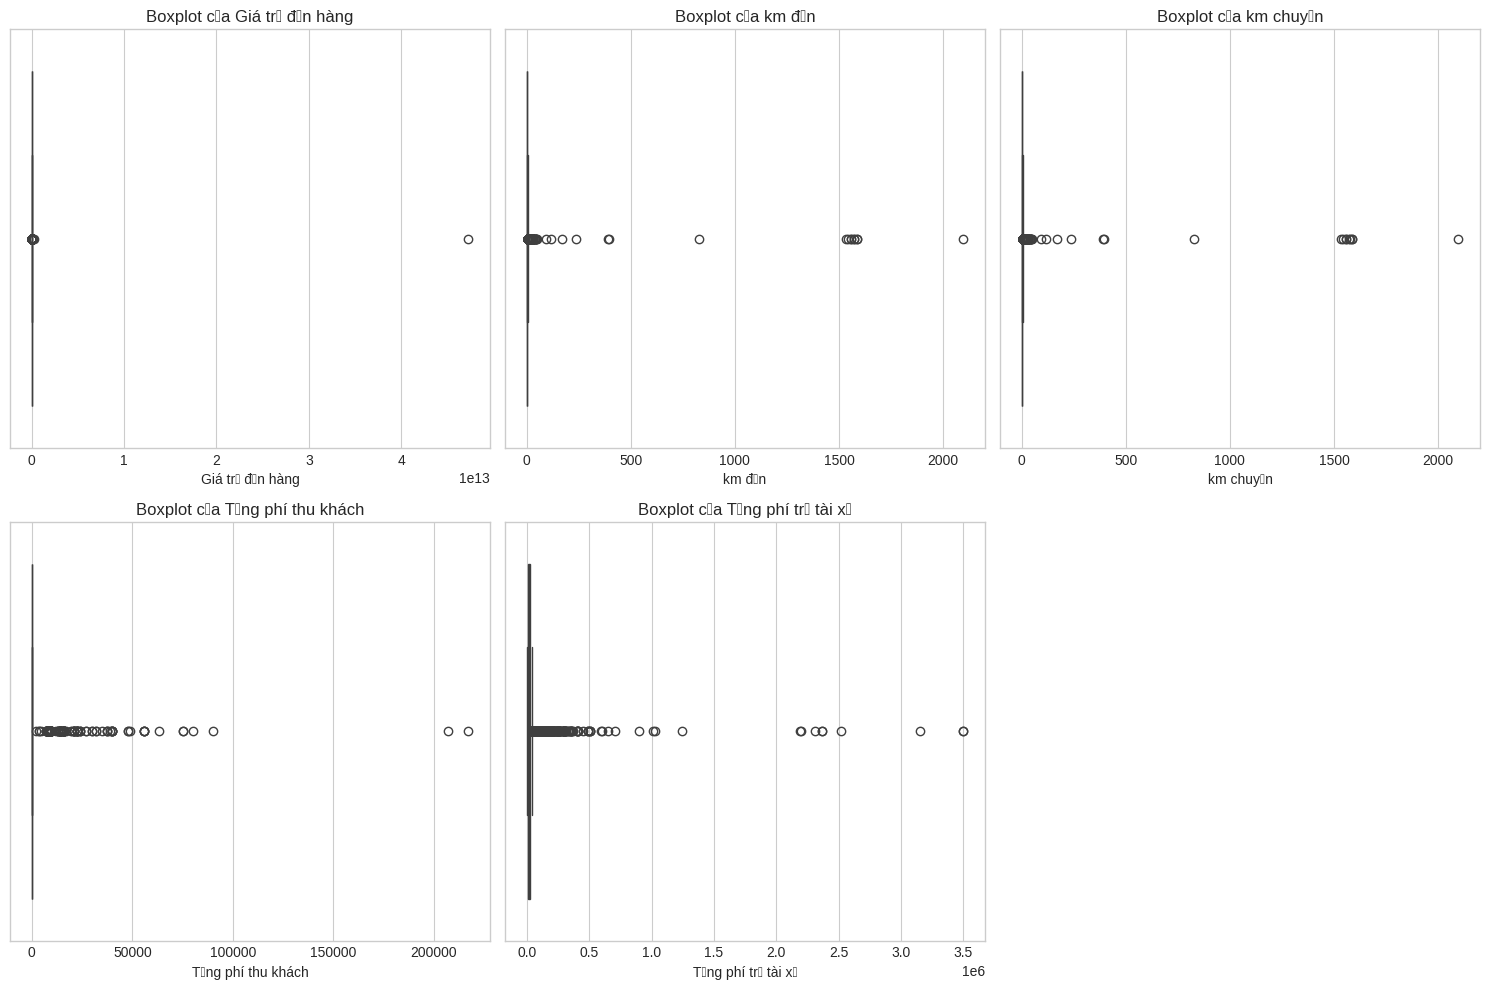

In [ ]:
columns_to_check = ['Giá trị đơn hàng', 'km đơn', 'km chuyến', 'Tổng phí thu khách', 'Tổng phí trả tài xế']


# Vẽ boxplot cho từng cột
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # 2 hàng, 3 cột
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot của {col}')


plt.tight_layout()  # Đảm bảo không bị chồng lấn
plt.show()

In [ ]:
df['Thời gian giao hàng'] = (
    df['Thời gian hoàn thành đơn'] - df['Thời điểm tài xế lấy hàng']
).dt.total_seconds() / 60

In [ ]:
# Tạo bản sao dữ liệu đã xử lý
df_processed = df.copy()

# Chuyển đổi các cột thời gian sang dạng datetime
df_processed['Ngày tạo đơn'] = pd.to_datetime(df_processed['Ngày tạo đơn'], errors='coerce')
df_processed['Thời gian hoàn thành đơn'] = pd.to_datetime(df_processed['Thời gian hoàn thành đơn'], errors='coerce')
df_processed['Thời điểm tạo đơn'] = pd.to_datetime(df_processed['Thời điểm tạo đơn'], errors='coerce')
df_processed['Thời điểm tài xế nhận đơn'] = pd.to_datetime(df_processed['Thời điểm tài xế nhận đơn'], errors='coerce')
df_processed['Thời điểm tài xế lấy hàng'] = pd.to_datetime(df_processed['Thời điểm tài xế lấy hàng'], errors='coerce')

# Tính toán thời gian giao hàng (tính bằng giờ)
df_processed['Thời gian giao hàng (giờ)'] = (df_processed['Thời gian hoàn thành đơn'] - df_processed['Thời điểm tạo đơn']).dt.total_seconds() / 3600
df_processed['Thời gian nhận đơn (phút)'] = (df_processed['Thời điểm tài xế nhận đơn'] - df_processed['Thời điểm tạo đơn']).dt.total_seconds() / 60
df_processed['Thời gian lấy hàng (phút)'] = (df_processed['Thời điểm tài xế lấy hàng'] - df_processed['Thời điểm tài xế nhận đơn']).dt.total_seconds() / 60

# Loại bỏ các dòng có giá trị thiếu (NaT) trong các cột thời gian
df_processed = df_processed.dropna(subset=['Ngày tạo đơn', 'Thời gian hoàn thành đơn'])
# **Xử lý outlier bằng phương pháp IQR (Interquartile Range)**
Q1 = df_processed['Thời gian giao hàng (giờ)'].quantile(0.25)
Q3 = df_processed['Thời gian giao hàng (giờ)'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị ngoại lai
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc dữ liệu để loại bỏ các giá trị ngoại lai
df_processed = df_processed[(df_processed['Thời gian giao hàng (giờ)'] >= lower_bound) & (df_processed['Thời gian giao hàng (giờ)'] <= upper_bound)]

# Xử lý outlier cho 'Thời gian nhận đơn (phút)'
Q1_receive = df_processed['Thời gian nhận đơn (phút)'].quantile(0.25)
Q3_receive = df_processed['Thời gian nhận đơn (phút)'].quantile(0.75)
IQR_receive = Q3_receive - Q1_receive

# Xác định các giá trị ngoại lai cho 'Thời gian nhận đơn (phút)'
lower_bound_receive = Q1_receive - 1.5 * IQR_receive
upper_bound_receive = Q3_receive + 1.5 * IQR_receive

# Lọc dữ liệu để loại bỏ các giá trị ngoại lai trong 'Thời gian nhận đơn (phút)'
df_processed = df_processed[(df_processed['Thời gian nhận đơn (phút)'] >= lower_bound_receive) &
                            (df_processed['Thời gian nhận đơn (phút)'] <= upper_bound_receive)]

# Xử lý outlier cho 'Thời gian lấy hàng (phút)'
Q1_pickup = df_processed['Thời gian lấy hàng (phút)'].quantile(0.25)
Q3_pickup = df_processed['Thời gian lấy hàng (phút)'].quantile(0.75)
IQR_pickup = Q3_pickup - Q1_pickup

# Xác định các giá trị ngoại lai cho 'Thời gian lấy hàng (phút)'
lower_bound_pickup = Q1_pickup - 1.5 * IQR_pickup
upper_bound_pickup = Q3_pickup + 1.5 * IQR_pickup

# Lọc dữ liệu để loại bỏ các giá trị ngoại lai trong 'Thời gian lấy hàng (phút)'
df_processed = df_processed[(df_processed['Thời gian lấy hàng (phút)'] >= lower_bound_pickup) &
                            (df_processed['Thời gian lấy hàng (phút)'] <= upper_bound_pickup)]

# Kiểm tra số lượng giá trị ngoại lai sau khi xử lý
outliers_receive = df[~df.index.isin(df_processed.index)]
outliers_pickup = df[~df.index.isin(df_processed.index)]



# **2.Nhập dữ liệu khám phá**

##**2.1. Phân tích theo thời gian**

### **2.1.1. Phân tích thời gian giao hàng và hiệu suất**

In [ ]:
df_processed = df_processed[
    (df_processed['Thời gian giao hàng (giờ)'] >= 0) &
    (df_processed['Thời gian nhận đơn (phút)'] >= 0) &
    (df_processed['Thời gian lấy hàng (phút)'] >= 0)
]

# Tính toán các thống kê mô tả
summary_stats = df_processed[['Thời gian giao hàng (giờ)', 'Thời gian nhận đơn (phút)', 'Thời gian lấy hàng (phút)']].describe()
print("Thống kê mô tả:")
print(summary_stats)

Thống kê mô tả:
       Thời gian giao hàng (giờ)  Thời gian nhận đơn (phút)  \
count               66067.000000               66067.000000   
mean                    0.993497                   0.384588   
std                     0.908979                   0.208990   
min                     0.018611                   0.050000   
25%                     0.349306                   0.233333   
50%                     0.687778                   0.316667   
75%                     1.333056                   0.466667   
max                     4.419444                   1.116667   

       Thời gian lấy hàng (phút)  
count               66067.000000  
mean                    5.046805  
std                     7.898512  
min                     0.000000  
25%                     0.000000  
50%                     1.383333  
75%                     6.058333  
max                    36.083333  


In [ ]:
# Phân tích thời gian giao hàng trung bình
average_delivery_time = df_processed['Thời gian giao hàng (giờ)'].mean()
print(f"Thời gian giao hàng trung bình: {average_delivery_time:.2f} giờ")

# Phân tích theo phương thức giao hàng (nếu có cột liên quan, ví dụ 'Siêu thị' hoặc 'Mã chuyến')
# Kiểm tra cột 'Siêu thị' và 'Khu vực' có tồn tại không
if 'Siêu thị' in df_processed.columns and 'Khu vực' in df_processed.columns:
    # Nhóm theo 'Khu vực' và 'Siêu thị', tính thời gian giao hàng trung bình
    delivery_time_by_region_and_store = df_processed.groupby(['Khu vực', 'Siêu thị'])['Thời gian giao hàng (giờ)'].mean().reset_index()
    # Sắp xếp theo 'Khu vực' (theo thứ tự bảng chữ cái)
    delivery_time_by_region_and_store = delivery_time_by_region_and_store.sort_values(by='Khu vực')
    print("\nThời gian giao hàng trung bình theo khu vực và siêu thị (sắp xếp theo khu vực):")
    print(delivery_time_by_region_and_store)
else:
    print("\nKhông tìm thấy cột 'Siêu thị' hoặc 'Khu vực' trong dữ liệu.")

Thời gian giao hàng trung bình: 0.99 giờ

Thời gian giao hàng trung bình theo khu vực và siêu thị (sắp xếp theo khu vực):
   Khu vực                     Siêu thị  Thời gian giao hàng (giờ)
0     HCM1                CM Bình Triệu                   0.772351
10    HCM1             CM Đồng Văn Cống                   0.768219
8     HCM1              CM Tuy Lý Vương                   0.702221
7     HCM1                   CM Phú Thọ                   1.006805
6     HCM1               CM Nguyễn Bình                   0.277174
9     HCM1                 CM Văn Thánh                   0.708979
4     HCM1                  CM Hòa Bình                   0.783335
3     HCM1            CM Huỳnh Tấn Phát                   0.945484
2     HCM1                   CM Cần Giờ                   0.148355
1     HCM1                CM Chu Văn An                   0.746416
5     HCM1                 CM Hậu Giang                   0.828791
21    HCM2              CM Phan Văn Hớn                   1.196566
27    H

In [ ]:
# Phân tích theo nhân viên giao hàng (nếu có cột liên quan, ví dụ 'Người tạo đơn')
if 'Tài xế' in df_processed.columns:
    delivery_time_by_driver = df_processed.groupby('Tài xế')['Thời gian giao hàng (giờ)'].mean()
    print("\nThời gian giao hàng trung bình theo người tạo đơn:")
    print(delivery_time_by_driver)


Thời gian giao hàng trung bình theo người tạo đơn:
Tài xế
130 - Dương Hồng Phú       2.179759
130 - Huỳnh Chí Thiện      0.937970
130 - Hồ Hồng Phúc         1.739251
130 - Lê Đình Tấn Đạt      0.900664
130 - Nguyễn Văn Bình      0.829517
                             ...   
556 - Trần Bá Huyền        0.516632
570 - Lê Hoài Biển         1.481925
570 - Nguyễn Thanh Long    1.775459
570 - Tiêu Quốc Dân        1.577274
570 - Trịnh Minh Chung     1.527899
Name: Thời gian giao hàng (giờ), Length: 220, dtype: float64


In [ ]:
# Phân tích thời gian giao hàng, thời gian nhận đơn và thời gian lấy hàng trung bình theo khu vực
if 'Khu vực' in df_processed.columns:
    delivery_time_by_region = df_processed.groupby('Khu vực')[['Thời gian giao hàng (giờ)', 'Thời gian nhận đơn (phút)', 'Thời gian lấy hàng (phút)']].mean()


    # In kết quả thời gian giao hàng, nhận đơn và lấy hàng trung bình theo khu vực
    print("Thời gian giao hàng trung bình, thời gian nhận đơn và thời gian lấy hàng trung bình theo khu vực:")
    print(delivery_time_by_region)



Thời gian giao hàng trung bình, thời gian nhận đơn và thời gian lấy hàng trung bình theo khu vực:
         Thời gian giao hàng (giờ)  Thời gian nhận đơn (phút)  \
Khu vực                                                         
HCM1                      0.802315                   0.425585   
HCM2                      1.106998                   0.354808   
XTRA                      1.019629                   0.407534   

         Thời gian lấy hàng (phút)  
Khu vực                             
HCM1                      5.483144  
HCM2                      4.446310  
XTRA                      6.778850  


In [ ]:
# Phân tích thời gian giao hàng, thời gian nhận đơn và thời gian lấy hàng trung bình theo khu vực
if 'Khu vực' in df_processed.columns:
    delivery_time_by_market = df_processed.groupby('Siêu thị')[['Thời gian nhận đơn (phút)', 'Thời gian lấy hàng (phút)']].mean()

    # In kết quả thời gian giao hàng, nhận đơn và lấy hàng trung bình theo khu vực
    print("Thời gian nhận đơn trung bình theo siêu thị:")
    print(delivery_time_by_market)

Thời gian nhận đơn trung bình theo siêu thị:
                             Thời gian nhận đơn (phút)  \
Siêu thị                                                 
CM Bình Triệu                                 0.398417   
CM Bình Tân                                   0.362410   
CM Chu Văn An                                 0.688217   
CM Cần Giờ                                    0.750275   
CM Củ Chi                                     0.391811   
CM Foodcosa                                   0.423231   
CM Hiệp Thành                                 0.342898   
CM Huỳnh Tấn Phát                             0.382187   
CM Hòa Bình                                   0.511404   
CM Hóc Môn                                    0.403333   
CM Hùng Vương                                 0.349567   
CM Hậu Giang                                  0.584415   
CM Lý Thường Kiệt                             0.273189   
CM Nguyễn Bình                                0.678343   
CM Nguyễn Đình Chiểu       

In [ ]:
# Phân tích thời gian giao hàng, thời gian nhận đơn và thời gian lấy hàng trung bình theo khu vực
if 'Khu vực' in df_processed.columns:
    delivery_time_by_market = df_processed.groupby('Siêu thị')[['Thời gian lấy hàng (phút)']].mean()

    # In kết quả thời gian giao hàng, nhận đơn và lấy hàng trung bình theo khu vực
    print("Thời gian lấy hàng trung bình theo siêu thị:")
    print(delivery_time_by_market)

Thời gian lấy hàng trung bình theo siêu thị:
                             Thời gian lấy hàng (phút)
Siêu thị                                              
CM Bình Triệu                                 2.514165
CM Bình Tân                                   4.924147
CM Chu Văn An                                 6.096391
CM Cần Giờ                                    3.430693
CM Củ Chi                                     1.810063
CM Foodcosa                                   2.187078
CM Hiệp Thành                                 6.797585
CM Huỳnh Tấn Phát                             5.359426
CM Hòa Bình                                   6.157047
CM Hóc Môn                                    2.922857
CM Hùng Vương                                 9.337192
CM Hậu Giang                                  8.477174
CM Lý Thường Kiệt                             4.844449
CM Nguyễn Bình                                2.530373
CM Nguyễn Đình Chiểu                          3.456627
CM Nguyễn Ảnh Thủ   

In [ ]:
# Phân tích thời gian giao hàng, thời gian nhận đơn và thời gian lấy hàng trung bình theo khu vực
if 'Khu vực' in df_processed.columns:
    delivery_time_by_market = df_processed.groupby('Siêu thị')[['Thời gian giao hàng (giờ)']].mean()

    # In kết quả thời gian giao hàng, nhận đơn và lấy hàng trung bình theo khu vực
    print("Thời gian giao hàng trung bình theo siêu thị:")
    print(delivery_time_by_market)

Thời gian giao hàng trung bình theo siêu thị:
                             Thời gian giao hàng (giờ)
Siêu thị                                              
CM Bình Triệu                                 0.772351
CM Bình Tân                                   2.050858
CM Chu Văn An                                 0.746416
CM Cần Giờ                                    0.148355
CM Củ Chi                                     0.729703
CM Foodcosa                                   0.701431
CM Hiệp Thành                                 0.634707
CM Huỳnh Tấn Phát                             0.945484
CM Hòa Bình                                   0.783335
CM Hóc Môn                                    0.432430
CM Hùng Vương                                 1.102056
CM Hậu Giang                                  0.828791
CM Lý Thường Kiệt                             1.390696
CM Nguyễn Bình                                0.277174
CM Nguyễn Đình Chiểu                          1.016463
CM Nguyễn Ảnh Thủ  

<ipython-input-101-149250c01237>:48: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
<ipython-input-101-149250c01237>:48: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
<ipython-input-101-149250c01237>:48: UserWarning: Glyph 7877 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
<ipython-input-101-149250c01237>:48: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
<ipython-input-101-149250c01237>:48: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.ti

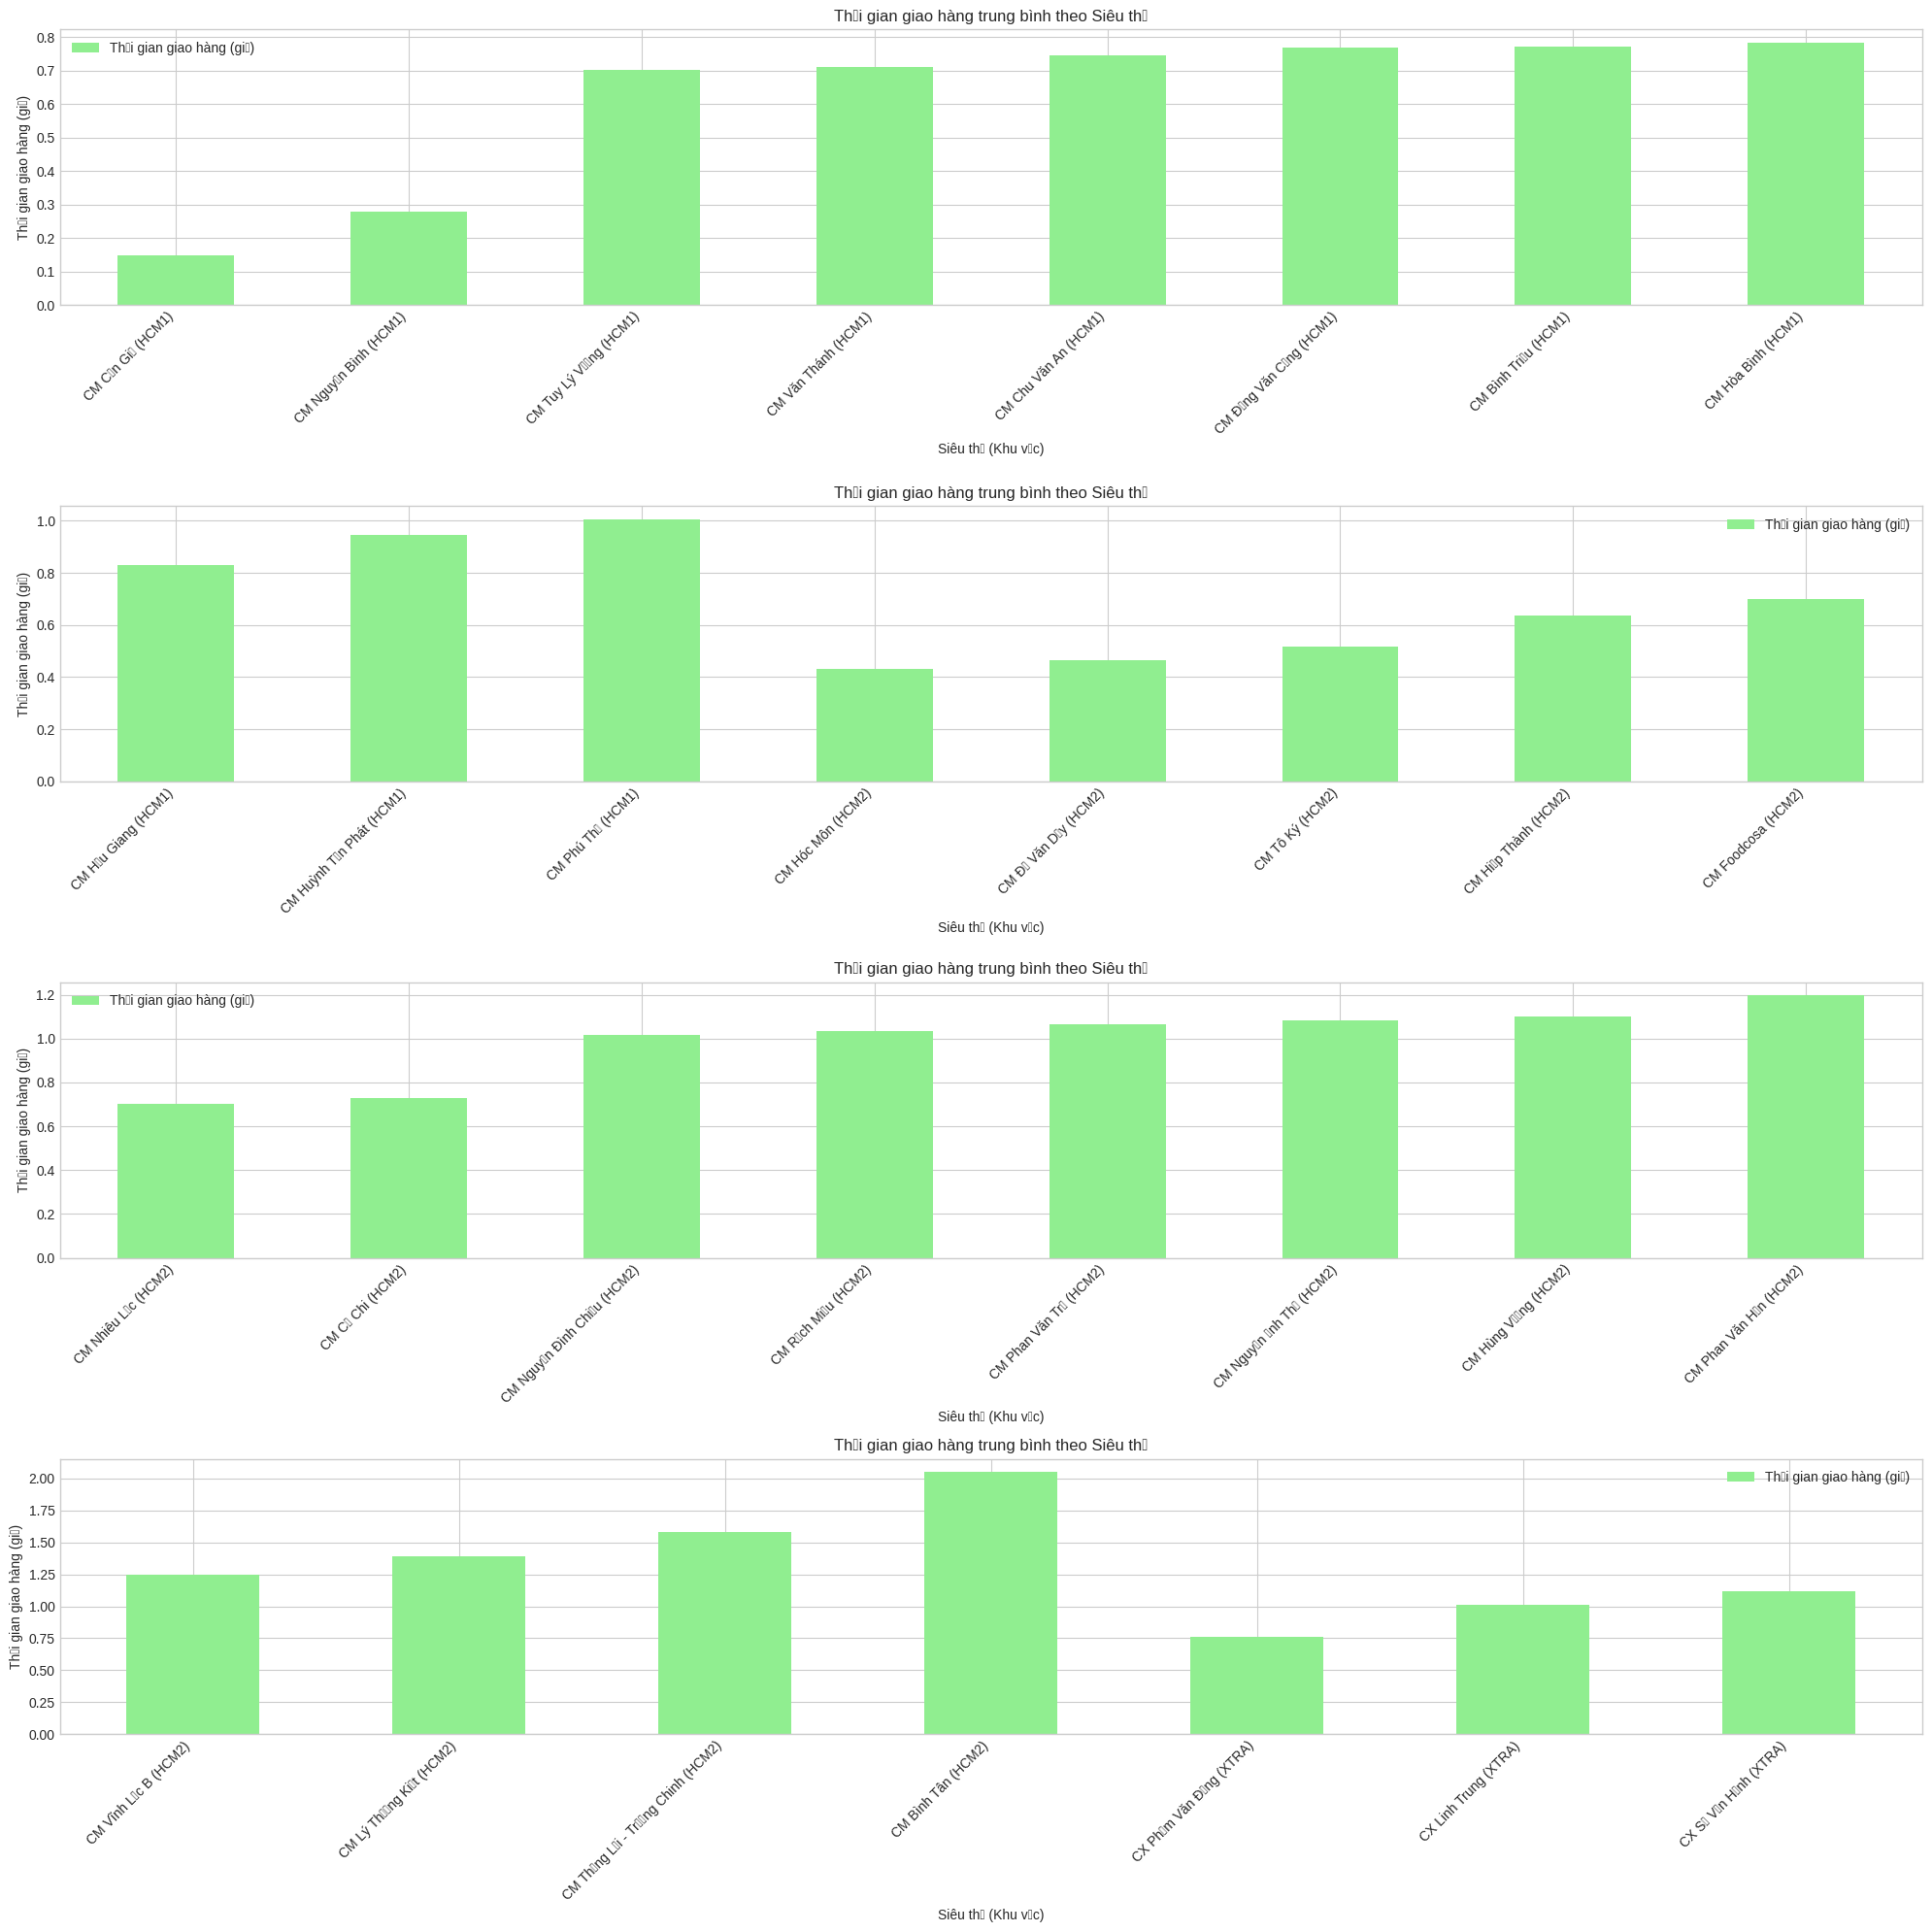

In [ ]:
if 'Siêu thị' in df_processed.columns and 'Khu vực' in df_processed.columns:
    # Nhóm theo 'Siêu thị' và 'Khu vực', tính thời gian giao hàng trung bình
    delivery_time_by_store = df_processed.groupby(['Siêu thị', 'Khu vực'])['Thời gian giao hàng (giờ)'].mean().reset_index()

    # Tạo nhãn mới cho trục X với định dạng "Siêu thị (Khu vực)"
    delivery_time_by_store['Nhãn'] = delivery_time_by_store['Siêu thị'] + ' (' + delivery_time_by_store['Khu vực'] + ')'

    # Sắp xếp theo 'Khu vực' (theo thứ tự bảng chữ cái) và sau đó theo thời gian giao hàng trung bình
    delivery_time_by_store = delivery_time_by_store.sort_values(by=['Khu vực', 'Thời gian giao hàng (giờ)'])

    # Chia dữ liệu thành các nhóm nhỏ với mỗi nhóm có khoảng 8 siêu thị
    unique_stores = delivery_time_by_store.index
    num_groups = (len(unique_stores) // 8) + 1  # Số nhóm siêu thị (mỗi nhóm 8 siêu thị)


    # Tạo subplots cho các nhóm siêu thị
    fig, axes = plt.subplots(num_groups, 1, figsize=(20, 5 * num_groups))


    # Đảm bảo axes là danh sách nếu chỉ có 1 nhóm
    if num_groups == 1:
        axes = [axes]


    # Vẽ từng biểu đồ cho từng nhóm siêu thị
    for i in range(num_groups):
        start_idx = i * 8  # Vị trí bắt đầu của nhóm
        end_idx = start_idx + 8  # Vị trí kết thúc của nhóm
        group_data = delivery_time_by_store.iloc[start_idx:end_idx]  # Dữ liệu của nhóm siêu thị


        # Vẽ biểu đồ cột cho nhóm siêu thị
        ax = axes[i]  # Sử dụng subplot tương ứng
        group_data.plot(kind='bar', x='Nhãn', y='Thời gian giao hàng (giờ)', color='lightgreen', ax=ax)


        # Tiêu đề và nhãn
        ax.set_title(f'Thời gian giao hàng trung bình theo Siêu thị')
        ax.set_xlabel('Siêu thị (Khu vực)')
        ax.set_ylabel('Thời gian giao hàng (giờ)')


        # Đảm bảo rằng trục X nhận các nhãn siêu thị phân loại
        ax.set_xticks(range(len(group_data)))  # Vị trí các nhãn trên trục X
        ax.set_xticklabels(group_data['Nhãn'], rotation=45, ha='right')


    plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
    plt.show()  # Hiển thị biểu đồ

- **Tổng quan**: Thời gian giao hàng trung bình dao động từ 0.2 giờ (12 phút) đến 2.2 giờ, với phần lớn siêu thị nằm trong khoảng 0.5 đến 1.5 giờ, cho thấy hiệu suất giao hàng cơ bản khá ổn định.
- **Xu hướng**: Hệ thống giao hàng có hiệu suất trung bình tốt, với đa số siêu thị duy trì thời gian giao hàng dưới 1.5 giờ. Tuy nhiên, có sự biến động đáng kể giữa các siêu thị, từ những nơi giao hàng cực nhanh (dưới 0.5 giờ) đến những nơi kéo dài hơn 2 giờ, phản ánh sự không đồng đều trong quy trình hoặc điều kiện vận hành.
- **Nhận xét**: Các siêu thị có thời gian giao hàng thấp (dưới 0.5 giờ) có thể được hưởng lợi từ vị trí địa lý thuận lợi, mật độ tài xế cao, hoặc quy trình tối ưu hóa hiệu quả. Ngược lại, những siêu thị có thời gian giao hàng cao (trên 1.5 giờ, đặc biệt là 2.2 giờ) có thể gặp thách thức như khoảng cách xa, thiếu tài xế, hoặc lượng đơn hàng quá tải vào giờ cao điểm.

<ipython-input-102-f93993d4f242>:32: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-102-f93993d4f242>:32: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-102-f93993d4f242>:32: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-102-f93993d4f242>:32: UserWarning: Glyph 7907 (\N{LATIN SMALL LETTER O WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-102-f93993d4f242>:32: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-102-f93993d4f242>:32: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()


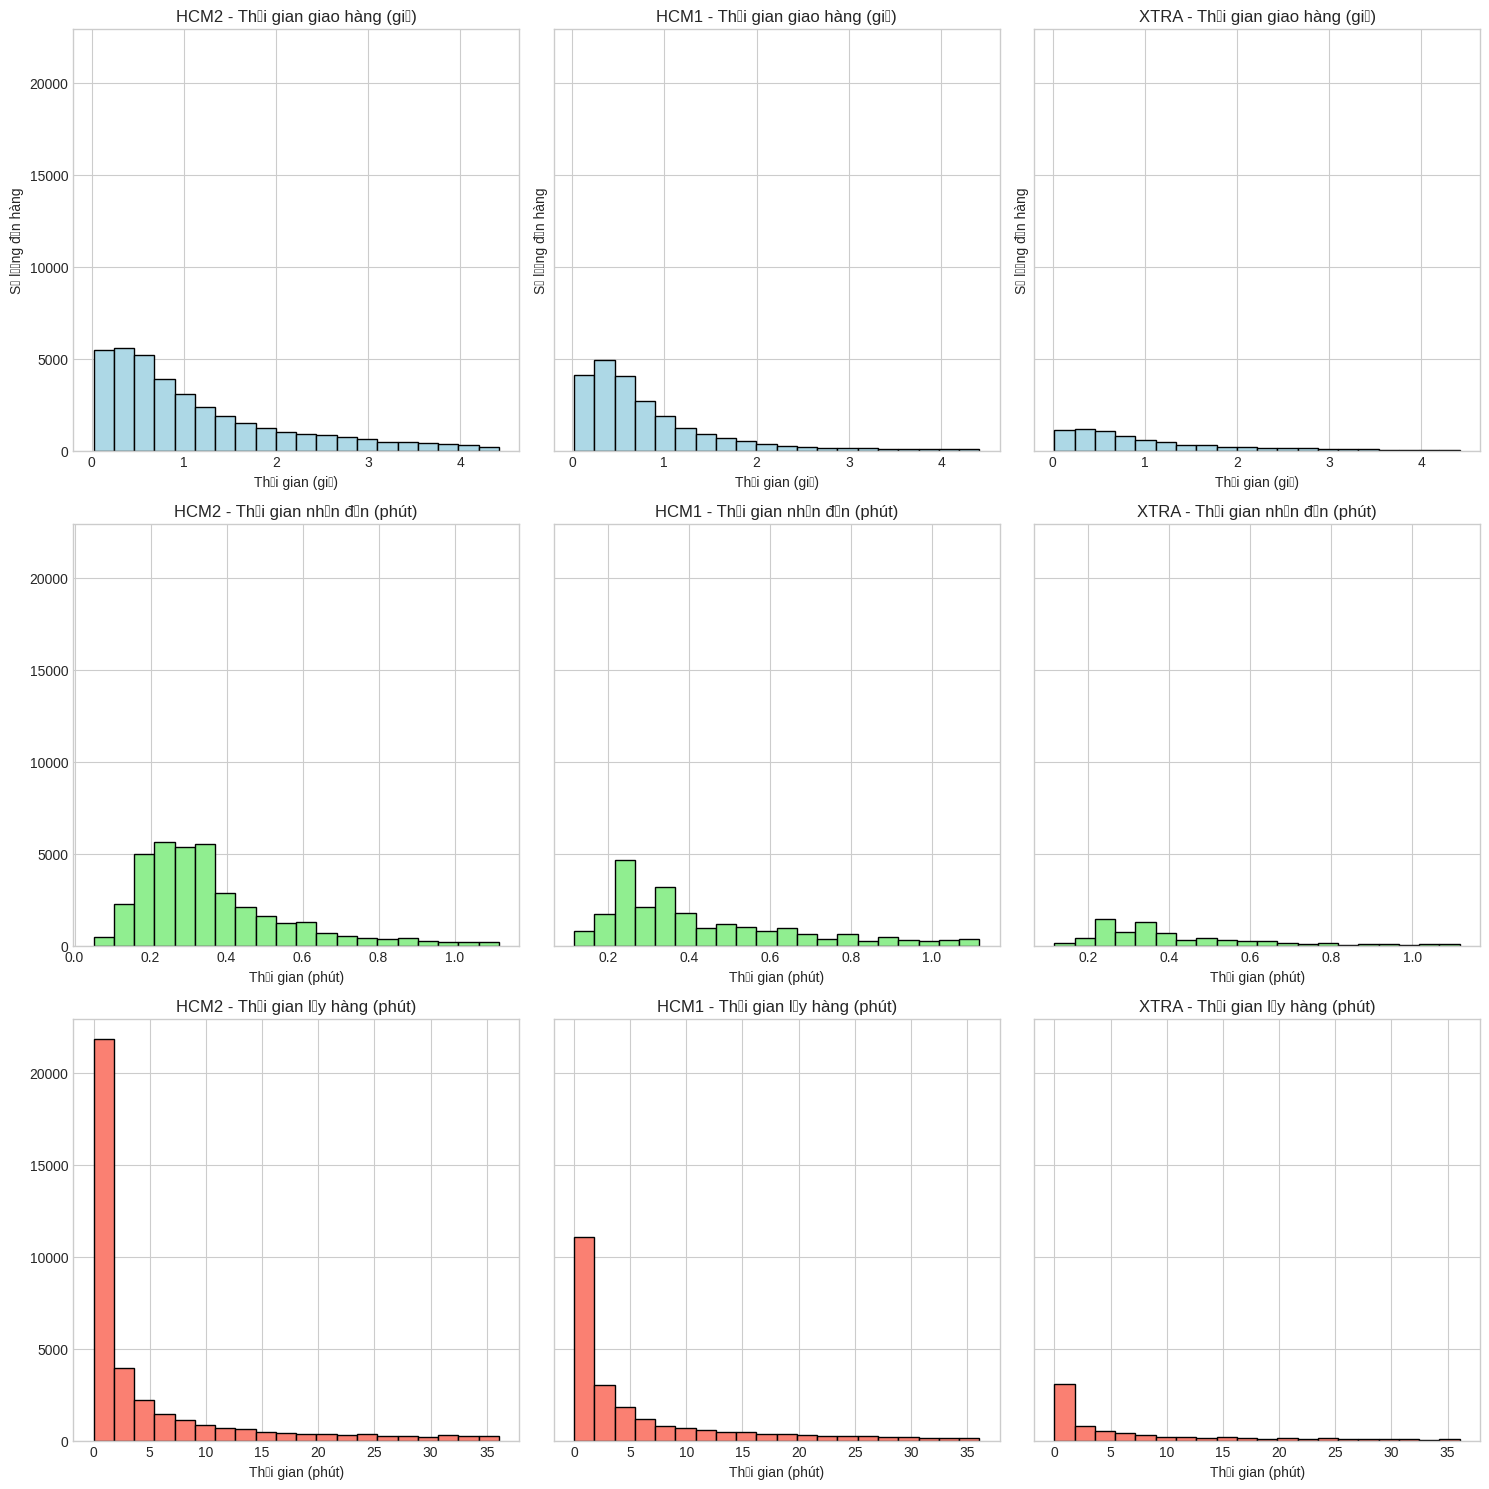

In [ ]:
# Lấy danh sách các khu vực duy nhất
regions = df_processed['Khu vực'].unique()

# Thiết lập số lượng biểu đồ dựa trên số khu vực
num_regions = len(regions)

# Tạo figure với 3 hàng (mỗi loại thời gian) và số cột bằng số khu vực
fig, axes = plt.subplots(3, num_regions, figsize=(5 * num_regions, 15), sharey=True)

# Vẽ biểu đồ phân phối cho từng loại thời gian theo khu vực
for idx, region in enumerate(regions):
    # Thời gian giao hàng (giờ)
    region_data = df_processed[df_processed['Khu vực'] == region]['Thời gian giao hàng (giờ)'].dropna()
    axes[0, idx].hist(region_data, bins=20, color='lightblue', edgecolor='black')
    axes[0, idx].set_title(f'{region} - Thời gian giao hàng (giờ)')
    axes[0, idx].set_xlabel('Thời gian (giờ)')
    axes[0, idx].set_ylabel('Số lượng đơn hàng')

    # Thời gian nhận đơn (phút)
    region_data = df_processed[df_processed['Khu vực'] == region]['Thời gian nhận đơn (phút)'].dropna()
    axes[1, idx].hist(region_data, bins=20, color='lightgreen', edgecolor='black')
    axes[1, idx].set_title(f'{region} - Thời gian nhận đơn (phút)')
    axes[1, idx].set_xlabel('Thời gian (phút)')

    # Thời gian lấy hàng (phút)
    region_data = df_processed[df_processed['Khu vực'] == region]['Thời gian lấy hàng (phút)'].dropna()
    axes[2, idx].hist(region_data, bins=20, color='salmon', edgecolor='black')
    axes[2, idx].set_title(f'{region} - Thời gian lấy hàng (phút)')
    axes[2, idx].set_xlabel('Thời gian (phút)')

# Điều chỉnh layout
plt.tight_layout()
plt.show()

**1. Thời gian giao hàng (giờ)**
- Phân phối có dạng **lệch phải** ở cả 3 khu vực: phần lớn đơn hàng được giao trong vòng **dưới 1 giờ**, một số ít kéo dài đến **hơn 4 giờ**.
- **HCM2** là khu vực có số lượng đơn hàng nhiều nhất, cho thấy tần suất hoạt động cao hơn.
- Điều này phản ánh hệ thống giao hàng đang hoạt động hiệu quả ở đa số các đơn hàng.

**2. Thời gian nhận đơn (phút)**
- Phân phối tiếp tục lệch phải, tập trung chủ yếu trong khoảng **0.2 – 0.5 phút** (tức **12 – 30 giây**).
- **HCM2** vẫn chiếm ưu thế về số lượng đơn.
- **XTRA** có thời gian nhận đơn nhanh và ổn định nhất với ít biến động.

**3. Thời gian lấy hàng (phút)**
- Đây là giai đoạn có **mức thời gian lớn nhất** so với 2 loại còn lại.
- Tuy phần lớn đơn hàng được lấy trong **dưới 5 phút**, nhưng vẫn tồn tại một số đơn kéo dài đến **hơn 30 phút**.
- **HCM2** tiếp tục là khu vực có khối lượng đơn lớn nhất và có hiệu suất tốt hơn nhờ mật độ phân phối tập trung ở giá trị thấp.

**Tổng kết**

- Quy trình xử lý đơn hàng nhìn chung hoạt động tốt với phần lớn đơn được xử lý trong thời gian ngắn.
- **Nhận đơn là bước nhanh nhất**, thường chỉ mất vài chục giây.
- **Lấy hàng là bước cần cải thiện**, do có độ biến động lớn nhất.
- **HCM2** là khu vực có hiệu suất xử lý cao và số lượng đơn nhiều nhất, có thể là khu vực trung tâm hoặc có quy mô lớn hơn.

### **2.1.2. Phân tích số lượng đơn hàng theo tháng ,giờ**

In [ ]:
#  Tính số lượng đơn hàng theo ngày
df['Ngày'] = df['Ngày tạo đơn'].dt.date  # Trích xuất ngày

# Đếm số lượng đơn hàng theo ngày
orders_by_day = df.groupby('Ngày')['Mã đơn hàng'].count().reset_index()
orders_by_day.columns = ['Ngày', 'Số lượng đơn hàng']

#  Tính số lượng đơn hàng theo giờ
df['Giờ'] = df['Thời điểm tạo đơn'].dt.hour  # Trích xuất giờ trong ngày

# Đếm số lượng đơn hàng theo giờ
orders_by_hour = df.groupby('Giờ')['Mã đơn hàng'].count().reset_index()
orders_by_hour.columns = ['Giờ', 'Số lượng đơn hàng']

<ipython-input-104-36e82d9ac929>:8: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-104-36e82d9ac929>:8: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-104-36e82d9ac929>:8: UserWarning: Glyph 7907 (\N{LATIN SMALL LETTER O WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-104-36e82d9ac929>:8: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U

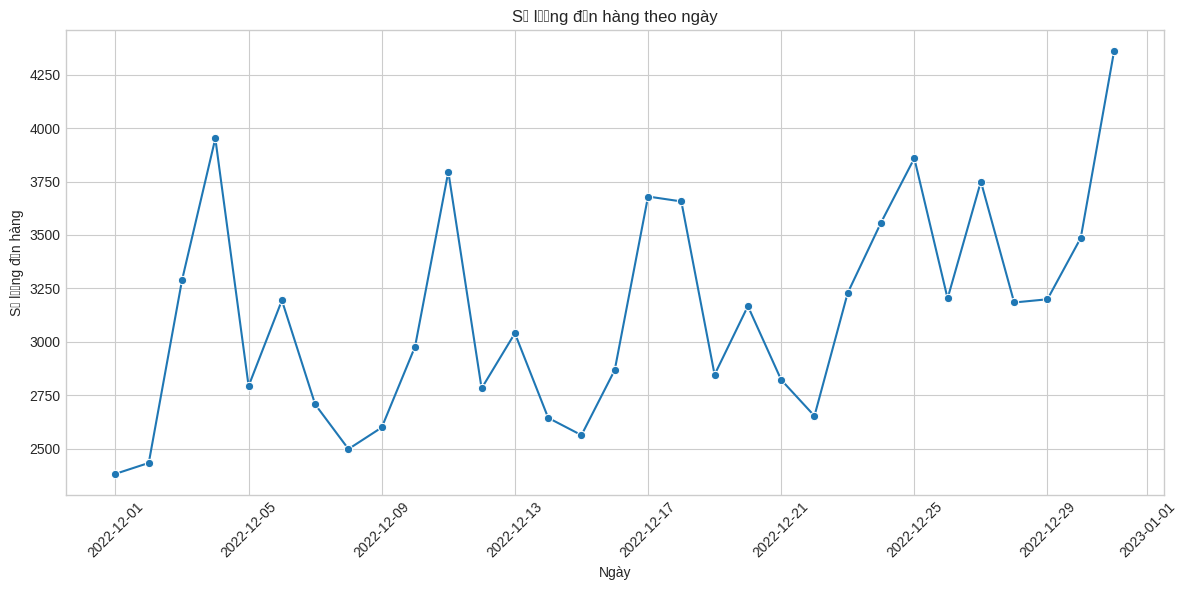

In [ ]:
# Trực quan hóa số lượng đơn hàng theo ngày
plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_by_day, x='Ngày', y='Số lượng đơn hàng', marker='o')
plt.title('Số lượng đơn hàng theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Nhận xét :
1. Tính biến động cao:
Số lượng đơn hàng dao động mạnh qua các ngày, từ khoảng 2400 đến hơn 4300 đơn/ngày.
Có nhiều đỉnh cao — đáng chú ý nhất vào:
Ngày 04/12 (khoảng 4000 đơn)
Ngày 12/12 (khoảng 3800 đơn)
Ngày 25/12 (khoảng 3900 đơn)
Ngày 31/12 (khoảng 4300 đơn - cao nhất)
2. Tác động theo mùa vụ:
Sự gia tăng rõ rệt vào các mốc cận lễ lớn như Noel (25/12) và Giao thừa (31/12) → thể hiện xu hướng mua sắm tăng vào dịp lễ.
Đây là các thời điểm hệ thống logistics cần:
Tăng cường nhân sự và tài xế
Tăng ca hoặc chia ca linh hoạt
Bổ sung xe và kho trung chuyển tạm thời
3. Nguy cơ tắc nghẽn giao hàng:
Các đỉnh đơn hàng cao có thể gây áp lực lên hệ thống giao nhận nếu không được chuẩn bị trước → nguy cơ trễ đơn, giao nhầm, chất lượng dịch vụ giảm.


<ipython-input-105-799e7d6e920a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_by_hour, x='Giờ', y='Số lượng đơn hàng', palette='Blues_d')
<ipython-input-105-799e7d6e920a>:8: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-105-799e7d6e920a>:8: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-105-799e7d6e920a>:8: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-105-799e7d6e920a>:8: UserWarning: Glyph 7907 (\N{LATIN SMALL LETTER O WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-105-799e7d6e920a>

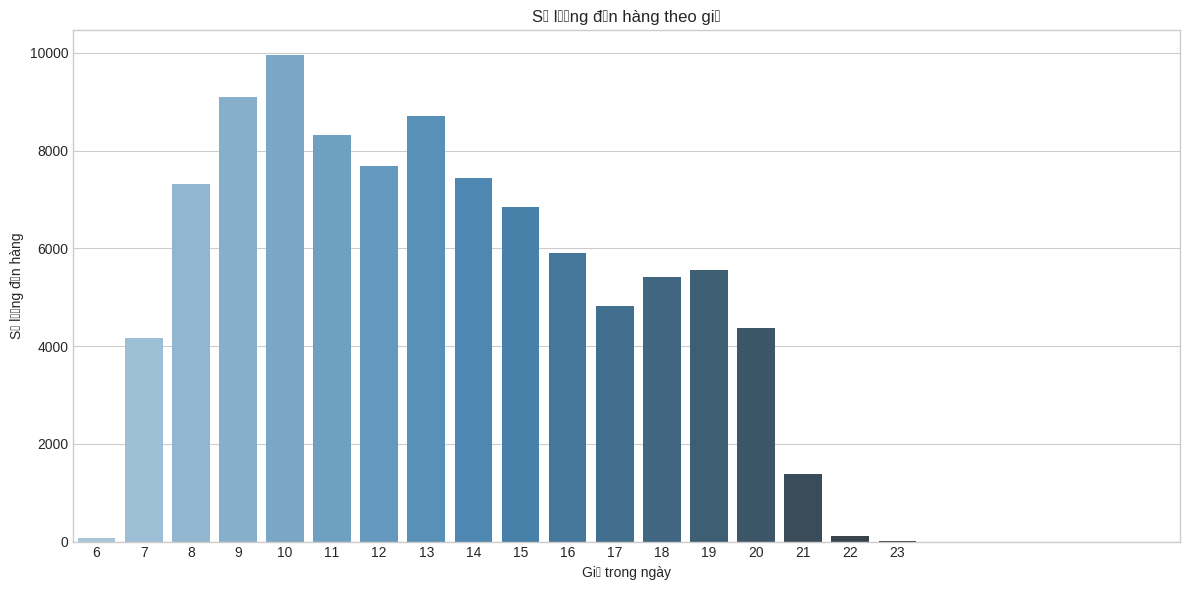

In [ ]:
#  Trực quan hóa số lượng đơn hàng theo giờ
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_hour, x='Giờ', y='Số lượng đơn hàng', palette='Blues_d')
plt.title('Số lượng đơn hàng theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


Nhận xét :
1. Khung giờ cao điểm đặt hàng:
Từ 8h đến 14h là khoảng thời gian sôi động nhất, với đỉnh vào lúc 10h (khoảng 10,000 đơn).
Giờ 9h, 11h và 13h cũng có số lượng đơn hàng cao (8,000–9,000).
2. Khung giờ thấp điểm:
Sau 20h, số lượng đơn giảm mạnh, gần như bằng 0 từ 22h trở đi.
Rất ít đơn hàng được đặt ngoài giờ hành chính → tập trung hoạt động giao nhận vào ban ngày là hợp lý

### **2.1.3. Phân tích theo khách hàng→ khách hàng thân quen, đề xuất khuyến mãi**

In [ ]:
# lọc sdt_khach có hạng Bach_Kim
df_bach_kim = df[df['Hạng thành viên'] == 'BACH_KIM']
#  Tính thời gian giao hàng trung bình cho mỗi khách hàng
avg_delivery_time = df.groupby('sdt_khach')['Thời gian giao hàng'].mean().reset_index()
avg_delivery_time.columns = ['sdt_khach', 'Thời gian giao hàng trung bình (phút)']


# Tính độ lệch chuẩn của thời gian giao hàng để đánh giá tính ổn định
std_delivery_time = df.groupby('sdt_khach')['Thời gian giao hàng'].std().reset_index()
std_delivery_time.columns = ['sdt_khach', 'Độ lệch chuẩn thời gian giao hàng']
# 5. Kết hợp tần suất giao hàng, thời gian giao hàng trung bình và độ lệch chuẩn
customer_analysis = pd.merge(df_bach_kim, avg_delivery_time, on='sdt_khach')
customer_analysis = pd.merge(customer_analysis, std_delivery_time, on='sdt_khach')


#  Lọc ra khách hàng thân quen (tần suất giao hàng > 5 và độ lệch chuẩn thấp)
frequent_customers = customer_analysis[ (customer_analysis['Độ lệch chuẩn thời gian giao hàng'] < customer_analysis['Độ lệch chuẩn thời gian giao hàng'].quantile(0.75))]
#  Hiển thị các khách hàng thân quen
print("Khách hàng thân quen:")
print(frequent_customers[['sdt_khach', 'Hạng thành viên', 'Thời gian giao hàng trung bình (phút)', 'Độ lệch chuẩn thời gian giao hàng']])

Khách hàng thân quen:
      sdt_khach Hạng thành viên  Thời gian giao hàng trung bình (phút)  \
2    0933480139        BACH_KIM                               2.733333   
3    0908051219        BACH_KIM                              39.611111   
5    0344767167        BACH_KIM                              31.013333   
6    0965292474        BACH_KIM                              25.236667   
8    0909929578        BACH_KIM                              12.304167   
..          ...             ...                                    ...   
736  0908998359        BACH_KIM                               7.583333   
739  0909244827        BACH_KIM                               8.933333   
740  0784607469        BACH_KIM                              12.493333   
742  0903170154        BACH_KIM                              51.476667   
743  0909244827        BACH_KIM                               8.933333   

     Độ lệch chuẩn thời gian giao hàng  
2                             0.542115  
3      

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7907 (\N{LATIN SMALL LETTER O WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7911 (\N{LATIN SMA

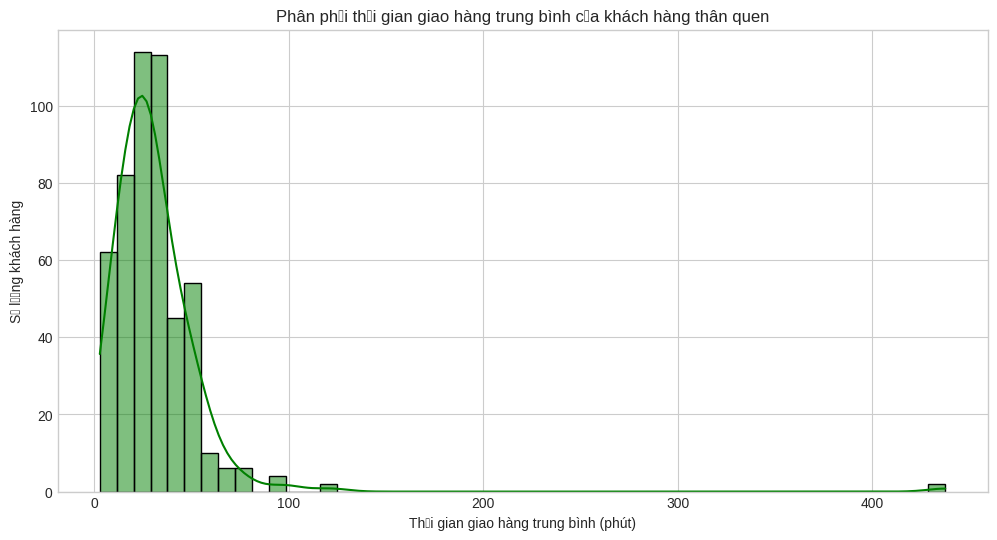

In [ ]:
#  Vẽ biểu đồ phân phối thời gian giao hàng trung bình của khách hàng thân quen
plt.figure(figsize=(12, 6))
sns.histplot(frequent_customers['Thời gian giao hàng trung bình (phút)'], bins=50, kde=True, color='green')
plt.title('Phân phối thời gian giao hàng trung bình của khách hàng thân quen')
plt.xlabel('Thời gian giao hàng trung bình (phút)')
plt.ylabel('Số lượng khách hàng')
plt.show()

1. Nhận xét
Đa số khách hàng thân quen có thời gian giao hàng trung bình từ 10 đến 50 phút, cho thấy hệ thống giao hàng đang vận hành hiệu quả với độ trễ thấp.
Việc giữ thời gian giao hàng ngắn là yếu tố then chốt giúp nâng cao mức độ hài lòng và tỷ lệ khách hàng quay lại.
Đỉnh phân phối rơi vào khoảng 20–30 phút, cho thấy đội ngũ giao hàng đang hoạt động tốt nhất ở các khu vực gần trung tâm kho/supermarket.
2. Sự xuất hiện của các đơn hàng giao chậm (outliers) là vấn đề logistics cần xử lý
Một số đơn hàng có thời gian giao lên đến hơn 100, thậm chí 400 phút, điều này không thể chấp nhận được trong hệ thống logistics tối ưu.
Có thể nguyên nhân là:
Giao sai thời điểm (giờ cao điểm, thời tiết xấu)
Tài xế bị điều phối quá xa
Sai sót thông tin địa chỉ hoặc khách không nhận hàng

### **2.1.4. Phân tích hiệu quả của tài xế giao hàng**

In [ ]:
# Tính toán thời gian giao hàng (tính bằng giờ)
df_processed['Thời gian giao hàng (phút)'] = (df_processed['Thời gian hoàn thành đơn'] - df_processed['Thời điểm tạo đơn']).dt.total_seconds() / 60
# Tính tỉ lệ hoàn thành đơn theo tài xế
driver_completion = df_processed.groupby('Tài xế')['trạng_thái_đơn'].value_counts(normalize=True).unstack().fillna(0)
driver_completion['Tỉ lệ hoàn thành (%)'] = driver_completion['HOÀN THÀNH'] * 100
print("Tỉ lệ hoàn thành đơn theo tài xế (%):")
print(driver_completion[['Tỉ lệ hoàn thành (%)']])


# Tính thời gian giao hàng trung bình theo tài xế (chỉ tính đơn hoàn thành)
completed_orders = df_processed[df_processed['trạng_thái_đơn'] == 'HOÀN THÀNH']
avg_delivery_time_by_driver = completed_orders.groupby('Tài xế')['Thời gian giao hàng (phút)'].mean()
print("\nThời gian giao hàng trung bình theo tài xế (phút):")
print(avg_delivery_time_by_driver)

Tỉ lệ hoàn thành đơn theo tài xế (%):
trạng_thái_đơn           Tỉ lệ hoàn thành (%)
Tài xế                                       
130 - Dương Hồng Phú               100.000000
130 - Huỳnh Chí Thiện               98.969072
130 - Hồ Hồng Phúc                  97.416021
130 - Lê Đình Tấn Đạt              100.000000
130 - Nguyễn Văn Bình              100.000000
...                                       ...
556 - Trần Bá Huyền                100.000000
570 - Lê Hoài Biển                  99.572650
570 - Nguyễn Thanh Long             97.282609
570 - Tiêu Quốc Dân                 99.755501
570 - Trịnh Minh Chung              98.898678

[220 rows x 1 columns]

Thời gian giao hàng trung bình theo tài xế (phút):
Tài xế
130 - Dương Hồng Phú       130.785539
130 - Huỳnh Chí Thiện       56.407862
130 - Hồ Hồng Phúc         105.797126
130 - Lê Đình Tấn Đạt       54.039822
130 - Nguyễn Văn Bình       49.771000
                              ...    
556 - Trần Bá Huyền         30.997917
570 - Lê Hoài B

In [ ]:
# Tính tổng số đơn hàng theo tài xế từ toàn bộ dữ liệu
total_orders_by_driver = df_processed.groupby('Tài xế')['Mã chuyến'].nunique()

# Chỉ giữ lại các tài xế có số đơn hàng > 100
eligible_drivers = total_orders_by_driver[total_orders_by_driver > 100].index

# Lọc dữ liệu chỉ chứa các tài xế hợp lệ
completed_orders_filtered = completed_orders[completed_orders['Tài xế'].isin(eligible_drivers)]
df_processed_filtered = df_processed[df_processed['Tài xế'].isin(eligible_drivers)]

# Tính lại các chỉ số dựa trên tập lọc
avg_delivery_time_by_driver = completed_orders_filtered.groupby('Tài xế')['Thời gian giao hàng (phút)'].mean()
trips_per_driver = completed_orders_filtered.groupby('Tài xế')['Mã chuyến'].nunique()
area_by_driver = completed_orders_filtered.groupby('Tài xế')['Khu vực'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Không xác định')
supermarket_by_driver = completed_orders_filtered.groupby('Tài xế')['Siêu thị'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Không xác định')

total_orders_by_driver_filtered = df_processed_filtered.groupby('Tài xế')['Mã chuyến'].nunique()
completed_orders_by_driver = completed_orders_filtered.groupby('Tài xế')['Mã chuyến'].nunique()
completion_rate_by_driver = (completed_orders_by_driver / total_orders_by_driver_filtered * 100).fillna(0)

# Kết hợp thành bảng thống kê
driver_stats = pd.DataFrame({
    'Thời gian trung bình (phút)': avg_delivery_time_by_driver,
    'Số chuyến': trips_per_driver,
    'Khu vực': area_by_driver,
    'Siêu thị': supermarket_by_driver,
    'Tỷ lệ hoàn thành (%)': completion_rate_by_driver
})

# Lấy top 10 tài xế hiệu quả nhất
top_10_efficient_drivers = driver_stats.sort_values(by='Thời gian trung bình (phút)').head(10)

# Hiển thị kết quả
print("Top 10 tài xế có thời gian giao hàng trung bình thấp nhất (chỉ tính tài xế có >100 đơn hàng):")
print(top_10_efficient_drivers)

Top 10 tài xế có thời gian giao hàng trung bình thấp nhất (chỉ tính tài xế có >100 đơn hàng):
                             Thời gian trung bình (phút)  Số chuyến Khu vực  \
Tài xế                                                                        
180 - Võ Hồng Khánh                             7.894676        144    HCM1   
180 - Nguyễn Văn Bột                            9.812998        159    HCM1   
508 - Lê Văn Vinh                              15.310552        308    HCM1   
530 - Đỗ Ngọc Thịnh                            18.587679        418    HCM1   
508 - Bùi Quốc Thông                           18.736788        193    HCM1   
196 - Phạm Nguyễn Phúc Loan                    19.706612        184    HCM2   
178 - Tăng Khánh Hiệp                          22.561568        389    HCM1   
301 - Tống Lê Duy Khang                        24.664384        314    XTRA   
130 - Trần Văn Dân                             25.640718        650    HCM2   
196 - Nguyễn Thành Hoa               

<ipython-input-110-33f3ff9d4c20>:18: UserWarning: Glyph 7891 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-110-33f3ff9d4c20>:18: UserWarning: Glyph 7877 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-110-33f3ff9d4c20>:18: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-110-33f3ff9d4c20>:18: UserWarning: Glyph 7895 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-110-33f3ff9d4c20>:18: UserWarning: Glyph 7885 (\N{LATIN SMALL LETTER O WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-110-33f3ff9d4c20>:18: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
 

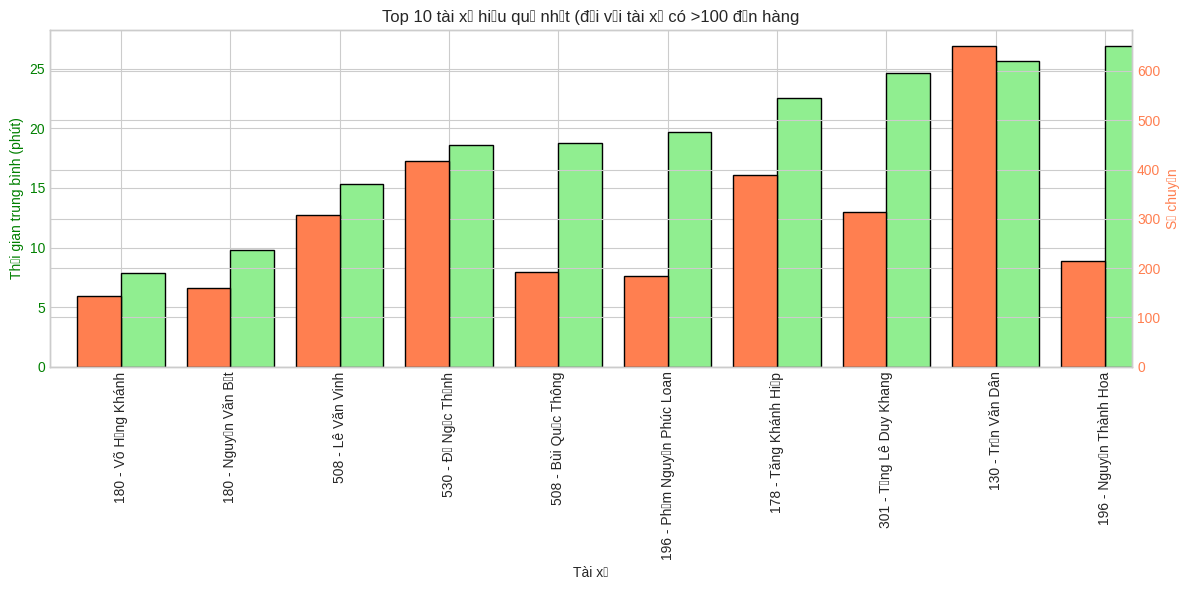

In [ ]:
# Vẽ biểu đồ cột cho top 10 tài xế hiệu quả nhất (thời gian và số chuyến)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
# Vẽ cột thời gian trung bình
top_10_efficient_drivers['Thời gian trung bình (phút)'].plot(kind='bar', color='lightgreen', edgecolor='black', ax=ax1, position=0, width=0.4)
# Vẽ cột số chuyến
top_10_efficient_drivers['Số chuyến'].plot(kind='bar', color='coral', edgecolor='black', ax=ax2, position=1, width=0.4)


ax1.set_title('Top 10 tài xế hiệu quả nhất (đối với tài xế có >100 đơn hàng')
ax1.set_xlabel('Tài xế')
ax1.set_ylabel('Thời gian trung bình (phút)', color='green')
ax2.set_ylabel('Số chuyến', color='coral')
ax1.tick_params(axis='y', labelcolor='green')
ax2.tick_params(axis='y', labelcolor='coral')
plt.xticks(rotation=45, ha='right')
ax1.grid(True)
plt.tight_layout()
plt.show()

Nhận xét:

- Biểu đồ trình bày danh sách 10 tài xế có hiệu suất cao nhất (đối với tài xế có hơn 100 đơn hàng), dựa trên hai tiêu chí: thời gian giao hàng trung bình (phút) và số lượng chuyến giao hàng. Mỗi tài xế được biểu diễn với hai cột: cột màu xanh lá thể hiện thời gian trung bình giao hàng, trong khi cột màu cam thể hiện tổng số chuyến đã thực hiện.
- Nhìn chung, nhóm tài xế này thể hiện hiệu quả tốt ở ít nhất một khía cạnh: hoặc giao hàng nhanh, hoặc đảm nhận số lượng lớn đơn hàng. Một số tài xế nổi bật với thời gian giao hàng trung bình rất thấp (dưới 10 phút), cho thấy tốc độ xử lý đơn hàng nhanh chóng và khả năng tối ưu hóa lộ trình tốt. Ngược lại, có những tài xế đảm nhận số chuyến rất cao, thể hiện tần suất hoạt động dày đặc và vai trò quan trọng trong hệ thống.
- Biểu đồ cũng cho thấy sự đa dạng về phong cách làm việc: có người thiên về tốc độ, có người đảm nhận khối lượng lớn, và cũng có những người cân bằng giữa hai yếu tố này. Sự đa dạng này là tích cực, vì hệ thống cần cả tốc độ lẫn sự bền bỉ để đáp ứng nhiều loại nhu cầu vận hành khác nhau.
Tổng thể, biểu đồ cung cấp cái nhìn trực quan và rõ ràng về hiệu quả của tài xế, là cơ sở tốt để đánh giá, phân công công việc hợp lý và xây dựng các chính sách khen thưởng phù hợp.


In [ ]:
# Lấy top 10 tài xế có số chuyến nhiều nhất
top_10_most_trips_drivers = driver_stats.sort_values(by='Số chuyến', ascending=False).head(10)
# In kết quả top 10 tài xế có số chuyến nhiều nhất
print("\nTop 10 tài xế có số chuyến nhiều nhất và thời gian trung bình (phút):")
print(top_10_most_trips_drivers)


Top 10 tài xế có số chuyến nhiều nhất và thời gian trung bình (phút):
                          Thời gian trung bình (phút)  Số chuyến Khu vực  \
Tài xế                                                                     
133 - Hồng Pho Tân                          34.409297       1219    HCM2   
134 - Ông Phước Đức                         37.128494       1109    HCM1   
154 - Ngô Văn Tâm                           56.979525       1011    HCM1   
133 - Nguyễn Thanh Phong                    34.400342        927    HCM2   
136 - Phạm Tuấn Anh                        125.249438        919    HCM2   
506 - Huynh Văn Trường                      41.707454        919    HCM1   
133 - Trân Quang Huy Vu                     41.651151        869    HCM2   
130 - Nguyễn Văn Tài                        56.010434        845    HCM2   
135 - Đoàn Tấn Phong                        76.080033        798    HCM2   
506 - Nguyễn Thế Phương                     44.870030        778    HCM1   

                

<ipython-input-112-b4b4747ddb4a>:17: UserWarning: Glyph 7891 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-112-b4b4747ddb4a>:17: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-112-b4b4747ddb4a>:17: UserWarning: Glyph 7899 (\N{LATIN SMALL LETTER O WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-112-b4b4747ddb4a>:17: UserWarning: Glyph 7913 (\N{LATIN SMALL LETTER U WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-112-b4b4747ddb4a>:17: UserWarning: Glyph 7877 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-112-b4b4747ddb4a>:17: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<i

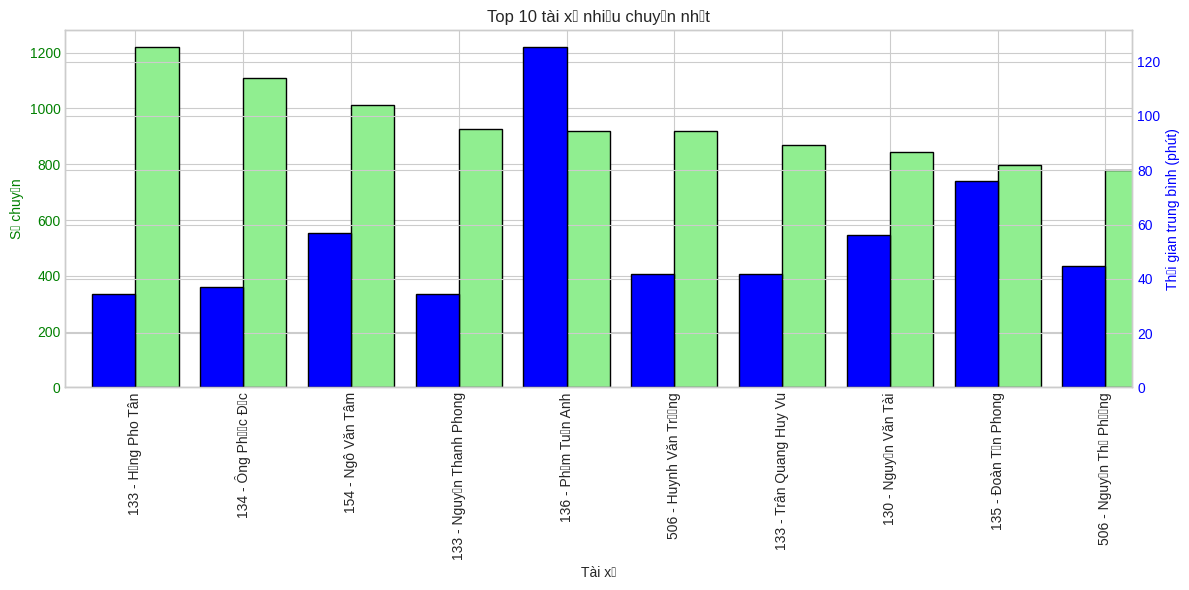

In [ ]:
# 8. Vẽ biểu đồ cột cho top 10 tài xế có số chuyến nhiều nhất (số chuyến và thời gian)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
# Vẽ cột số chuyến
top_10_most_trips_drivers['Số chuyến'].plot(kind='bar', color='lightgreen', edgecolor='black', ax=ax1, position=0, width=0.4)
# Vẽ cột thời gian trung bình
top_10_most_trips_drivers['Thời gian trung bình (phút)'].plot(kind='bar', color='blue', edgecolor='black', ax=ax2, position=1, width=0.4)

ax1.set_title('Top 10 tài xế nhiều chuyến nhất')
ax1.set_xlabel('Tài xế')
ax1.set_ylabel('Số chuyến', color='green')
ax2.set_ylabel('Thời gian trung bình (phút)', color='blue')
ax1.tick_params(axis='y', labelcolor='green')
ax2.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')
ax1.grid(True)
plt.tight_layout()
plt.show()

Nhận xét:
- Nhìn chung, các tài xế trong danh sách đều có tần suất làm việc cao, với số chuyến dao động từ khoảng 800 đến hơn 1200 chuyến. Đây là những cá nhân có mức độ đóng góp lớn cho hệ thống vận hành.
- Tuy nhiên, thời gian giao hàng trung bình giữa các tài xế có sự khác biệt rõ rệt. Một số tài xế như Phạm Tuấn Anh (136) và Đoàn Tấn Phong (135) có thời gian trung bình khá cao (lên tới 120 phút và 70 phút), trong khi các tài xế khác như Nguyễn Thanh Phong (133) hoặc Hồng Phò Tân (133) duy trì được thời gian trung bình thấp hơn (30–40 phút).
- Sự chênh lệch này có thể phản ánh khác biệt về tuyến đường, địa bàn hoạt động, hoặc điều kiện giao hàng cụ thể. Điều quan trọng là những tài xế duy trì số chuyến cao kèm thời gian trung bình hợp lý chính là những cá nhân thể hiện sự hiệu quả vượt trội cả về khối lượng công việc lẫn tốc độ xử lý.


<ipython-input-113-b4ccf1267ca9>:12: UserWarning: Glyph 7877 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-113-b4ccf1267ca9>:12: UserWarning: Glyph 7891 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-113-b4ccf1267ca9>:12: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-113-b4ccf1267ca9>:12: UserWarning: Glyph 7899 (\N{LATIN SMALL LETTER O WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-113-b4ccf1267ca9>:12: UserWarning: Glyph 7913 (\N{LATIN SMALL LETTER U WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-113-b4ccf1267ca9>:12: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_

<Figure size 2000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7873 (\N{

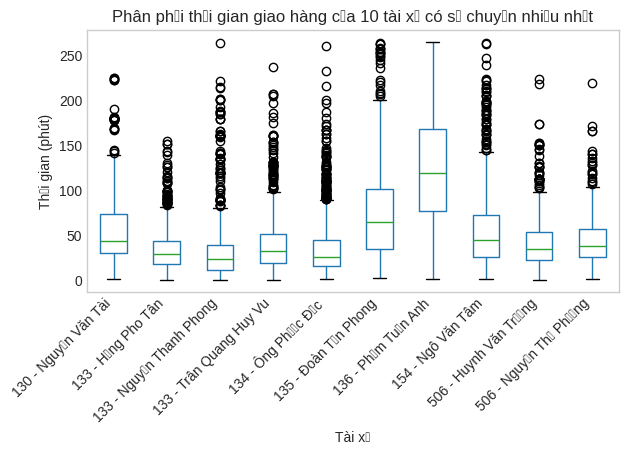

In [ ]:
# 9. Vẽ boxplot cho top 10 tài xế có số chuyến nhiều nhất
top_10_most_trips_driver_names = top_10_most_trips_drivers.index
top_10_most_trips_orders = completed_orders[completed_orders['Tài xế'].isin(top_10_most_trips_driver_names)]

plt.figure(figsize=(20, 6))
top_10_most_trips_orders.boxplot(column='Thời gian giao hàng (phút)', by='Tài xế', grid=False)
plt.title('Phân phối thời gian giao hàng của 10 tài xế có số chuyến nhiều nhất')
plt.suptitle('')  # Xóa tiêu đề mặc định của boxplot
plt.xlabel('Tài xế')
plt.ylabel('Thời gian (phút)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nhận xét:
- Tập hợp các biểu đồ đã phân tích cho thấy bức tranh toàn diện về hiệu suất của các tài xế dựa trên hai tiêu chí chính: số lượng chuyến giao hàng và thời gian giao hàng trung bình. Nhóm tài xế hiệu quả nhất có thể được nhìn nhận theo hai hướng: hoặc có thời gian giao hàng rất nhanh, hoặc đảm nhận số lượng đơn lớn, hoặc cân bằng tốt cả hai yếu tố này.
- Trong nhóm tài xế giao hàng nhanh nhất, có nhiều người duy trì được thời gian trung bình dưới 10 phút – đây là những cá nhân có khả năng xử lý đơn hàng nhanh chóng, tối ưu hóa lộ trình và hoạt động ổn định. Một số tài xế lại có thời gian trung bình cao hơn đáng kể, một phần có thể do đặc thù tuyến đường, điều kiện làm việc, hoặc khối lượng đơn hàng lớn dẫn đến độ trễ tích lũy.
- Đáng chú ý, biểu đồ cho thấy sự khác biệt lớn giữa các cá nhân. Một số tài xế như Nguyễn Thanh Phong, Trần Quang Huy Vũ hay Hồng Phò Tân có phân phối hẹp, ít outlier và thời gian trung bình thấp, thể hiện sự ổn định rất cao trong hiệu suất làm việc. Trong khi đó, các tài xế như Phạm Tuấn Anh hoặc Ngô Văn Tâm có median cao và rất nhiều outlier – cho thấy họ thường xuyên gặp các chuyến kéo dài bất thường, có thể do các nguyên nhân như tuyến đường xa, điều kiện khó khăn, hoặc vấn đề vận hành.


## **2.2. Phân tích theo phí và khu vực**

### **2.2.1Phân tích hiệu suất của các khu vực**

In [ ]:
#df['Thời gian giao hàng'] = (df['Thời gian hoàn thành đơn'] - df['Thời điểm tài xế lấy hàng']).dt.total_seconds() / 60

#  Tính toán thời gian giao hàng trung bình cho mỗi khu vực
avg_delivery_time_by_region = df.groupby('Khu vực')['Thời gian giao hàng'].mean().reset_index()

# Sắp xếp khu vực theo thời gian giao hàng trung bình
avg_delivery_time_by_region = avg_delivery_time_by_region.sort_values(by='Thời gian giao hàng', ascending=False)

#  Các khu vực có hiệu suất giao hàng tốt nhất và kém nhất
best_region = avg_delivery_time_by_region.iloc[0]  # Khu vực có thời gian giao hàng trung bình thấp nhất
worst_region = avg_delivery_time_by_region.iloc[-1]  # Khu vực có thời gian giao hàng trung bình cao nhất

print(f"Khu vực có hiệu suất giao hàng kém nhất: {best_region['Khu vực']} với thời gian giao hàng {best_region['Thời gian giao hàng']} phút.")
print(f"Khu vực có hiệu suất giao hàng tốt nhất: {worst_region['Khu vực']} với thời gian giao hàng {worst_region['Thời gian giao hàng']} phút.")

Khu vực có hiệu suất giao hàng kém nhất: XTRA với thời gian giao hàng 98.24883638616052 phút.
Khu vực có hiệu suất giao hàng tốt nhất: HCM1 với thời gian giao hàng 52.074991018732355 phút.


<ipython-input-115-c989d3b80ba8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Thời gian giao hàng', y='Khu vực', data=avg_delivery_time_by_region, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


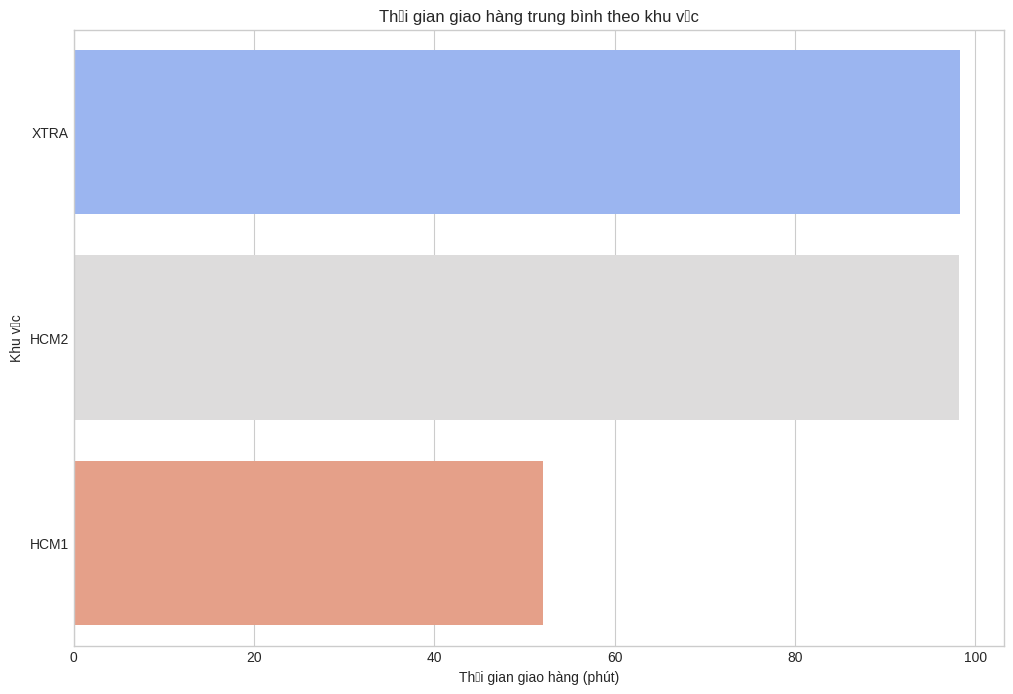

In [ ]:
#  Vẽ biểu đồ phân phối thời gian giao hàng cho từng khu vực
plt.figure(figsize=(12, 8))
sns.barplot(x='Thời gian giao hàng', y='Khu vực', data=avg_delivery_time_by_region, palette='coolwarm')
plt.title('Thời gian giao hàng trung bình theo khu vực')
plt.xlabel('Thời gian giao hàng (phút)')
plt.ylabel('Khu vực')
plt.show()

1.Chênh lệch thời gian giao hàng giữa các khu vực:
Khu vực HCM1 có thời gian giao hàng trung bình thấp nhất (~50 phút) → cho thấy hệ thống vận chuyển tại đây có thể đang hoạt động hiệu quả, mạng lưới giao hàng tối ưu hơn.
HCM2 và đặc biệt là XTRA có thời gian giao hàng cao hơn đáng kể (gần 100 phút) → có thể đang gặp vấn đề về khoảng cách, lưu lượng đơn hàng hoặc thiếu hụt nguồn lực vận chuyển.

2.Tác động đến trải nghiệm khách hàng:
Khu vực XTRA với thời gian giao hàng cao nhất có nguy cơ ảnh hưởng đến mức độ hài lòng của khách hàng.
Cần kiểm tra lại quy trình giao hàng tại XTRA: có thể thiếu kho trung chuyển, tuyến đường dài hoặc tắc nghẽn.

### **2.2.2. Phân tích chi phí giao hàng**

In [ ]:
# Tính chi phí trung bình cho mỗi chuyến giao hàng (Tổng phí trả tài xế / Số chuyến)
df['avg_delivery_cost_per_trip'] = df['Tổng phí trả tài xế'] / df['Số chuyến']

# Phân tích chi phí giao hàng theo khu vực
avg_cost_by_area = df.groupby('Khu vực')['avg_delivery_cost_per_trip'].mean().reset_index()

# Phân tích chi phí giao hàng theo giá trị đơn hàng
# Phân nhóm giá trị đơn hàng thành các phân khúc

bins = [10000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 61000000]
labels = ['10k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-61M']

# Tạo cột phân nhóm giá trị đơn hàng
df['order_value_group'] = pd.cut(df['Giá trị đơn hàng'], bins=bins, labels=labels, right=True)

# Tính chi phí giao hàng trung bình theo phân khúc giá trị đơn hàng
avg_cost_by_order_value = df.groupby('order_value_group')['avg_delivery_cost_per_trip'].mean().reset_index()

# Phân tích chi phí giao hàng theo hạng thành viên
avg_cost_by_member_level = df.groupby('Hạng thành viên')['avg_delivery_cost_per_trip'].mean().reset_index()
print("Chi phí trung bình theo khu vực:")
print(avg_cost_by_area)
print("\nChi phí trung bình theo giá trị đơn hàng:")
print(avg_cost_by_order_value)
print("\nChi phí trung bình theo hạng thành viên:")
avg_cost_by_member_level

Chi phí trung bình theo khu vực:
  Khu vực  avg_delivery_cost_per_trip
0    HCM1                15430.911207
1    HCM2                18578.674944
2    XTRA                24002.131265

Chi phí trung bình theo giá trị đơn hàng:
  order_value_group  avg_delivery_cost_per_trip
0          10k-100k                16676.540284
1         100k-500k                10011.224586
2           500k-1M                11155.149666
3             1M-5M                19965.078439
4            5M-10M                50390.545672
5           10M-50M                85926.884627
6           50M-61M               188147.058824

Chi phí trung bình theo hạng thành viên:


<ipython-input-116-ac0304a162ec>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_by_order_value = df.groupby('order_value_group')['avg_delivery_cost_per_trip'].mean().reset_index()


,Hạng thành viên,avg_delivery_cost_per_trip
0,BACH_KIM,18066.894235
1,THUONG,18206.816692


<ipython-input-117-a6b77da685a6>:18: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-117-a6b77da685a6>:18: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-117-a6b77da685a6>:18: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarni

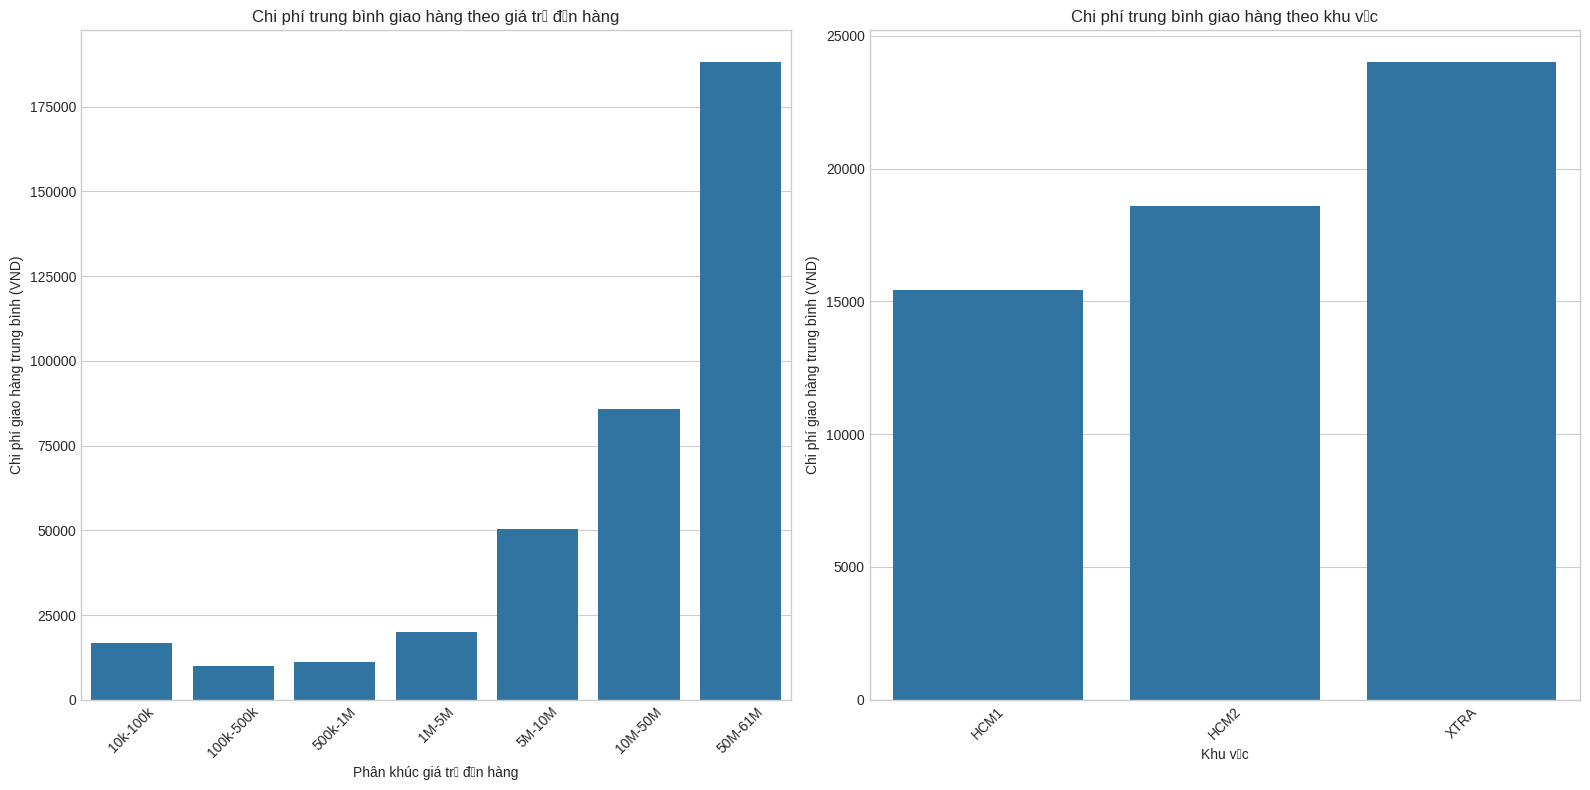

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Biểu đồ cho chi phí trung bình theo giá trị đơn hàng
sns.barplot(x='order_value_group', y='avg_delivery_cost_per_trip', data=avg_cost_by_order_value, ax=axes[0])
axes[0].set_title('Chi phí trung bình giao hàng theo giá trị đơn hàng')
axes[0].set_xlabel('Phân khúc giá trị đơn hàng')
axes[0].set_ylabel('Chi phí giao hàng trung bình (VND)')
axes[0].tick_params(axis='x', rotation=45)

# Biểu đồ cho chi phí trung bình theo khu vực
sns.barplot(x='Khu vực', y='avg_delivery_cost_per_trip', data=avg_cost_by_area, ax=axes[1])
axes[1].set_title('Chi phí trung bình giao hàng theo khu vực')
axes[1].set_xlabel('Khu vực')
axes[1].set_ylabel('Chi phí giao hàng trung bình (VND)')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**Nhận xét phần phân tích chi phí giao hàng tháng 12/2022**


**Thuộc tính phân tích:** `Phí chuyến cho tài xế`, `Tổng phí trả tài xế`


**1. Chi phí giao hàng theo giá trị đơn hàng**

- **Giá trị đơn hàng càng cao thì chi phí giao hàng trung bình cũng tăng rõ rệt**.
- Với đơn hàng nhỏ (10k–1M VND), chi phí chỉ từ khoảng **10.000–20.000 VND**.
- Từ đơn hàng **5 triệu VND trở lên**, chi phí tăng nhanh:
  - **5M–10M**: khoảng **50.000 VND**
  - **10M–50M**: gần **85.000 VND**
  - **Trên 50M**: lên tới gần **190.000 VND**
- **Giải thích**: Các đơn hàng giá trị cao thường đi kèm yêu cầu giao hàng đặc biệt (kích thước lớn, xe chuyên dụng, giao hẹn giờ, giao xa, cần đảm bảo an toàn...), dẫn đến phí tài xế tăng.

 **Khuyến nghị**:
- Tối ưu chính sách vận chuyển cho đơn hàng lớn.
- Đàm phán lại mức phí theo khối lượng và giá trị thực tế.
- Phân tích khả năng gộp đơn hàng lớn để tiết kiệm chi phí.

**2. Chi phí giao hàng theo khu vực**

- **XTRA** là khu vực có chi phí giao hàng cao nhất (~24.000 VND).
- **HCM2** cao hơn **HCM1**, cho thấy có thể là vùng ngoại ô hoặc mật độ tài xế thấp.
- **HCM1** thấp nhất (~15.000 VND), có thể do gần kho, nhiều tài xế, hoặc tuyến đường thuận lợi.

**Khuyến nghị**:
- Tối ưu phân bổ tài xế tại khu vực XTRA.
- Xem xét điều chỉnh chính sách giá giao hàng theo vùng địa lý.

**3. Chi phí giao hàng theo hạng thành viên**
- Hạng thành viên **BACH_KIM** có chi phí giao hàng trung bình thấp hơn so với **THUONG**. Có thể khách hàng thân thuộc và mức hạng cao có nhiều ưu đãi hơn.

---

**Tổng kết**

Chi phí giao hàng bị ảnh hưởng mạnh bởi:
- **Giá trị đơn hàng** (tăng mạnh theo quy mô đơn hàng).
- **Khu vực giao hàng** (chênh lệch đáng kể giữa các vùng).

Đây là cơ sở để cải thiện:
- Chính sách phí giao hàng,
- Phân bổ nguồn lực tài xế,
- Và tối ưu hiệu quả logistics cho doanh nghiệp.

###**2.2.3. Phân tích mối quan hệ giữa các yếu tố logistics**

**Tính toán các thuộc tính thời gian liên quan**

<ipython-input-118-11cf9844c8b2>:38: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  fig.tight_layout()
<ipython-input-118-11cf9844c8b2>:38: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.tight_layout()
<ipython-input-118-11cf9844c8b2>:38: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packag

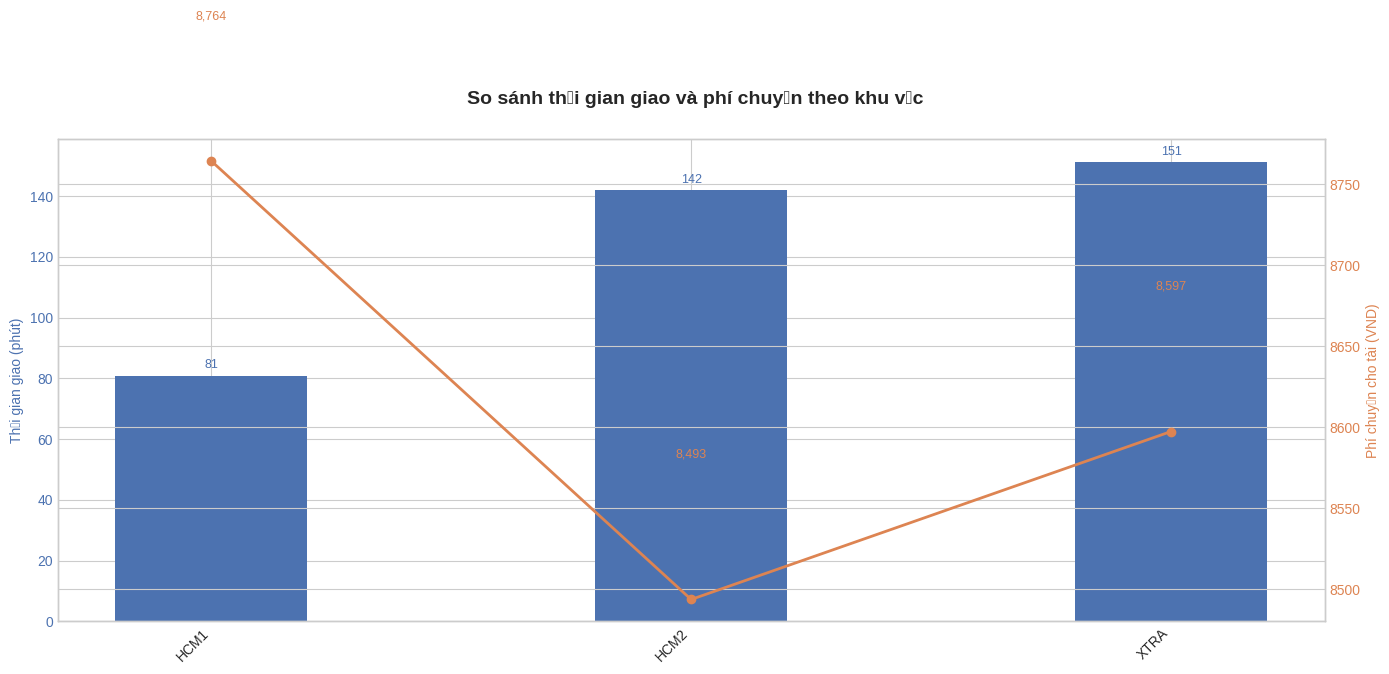

         Thời gian giao phút  Phí chuyến cho tài
Khu vực                                         
HCM1               80.924706         8764.277936
HCM2              142.048836         8493.621160
XTRA              151.210998         8597.275765


In [ ]:
# Tính toán thời gian giao hàng (phút)
df['Thời gian giao phút'] = (df['Thời gian hoàn thành đơn'] - df['Thời điểm tài xế nhận đơn']).dt.total_seconds() / 60
# Chuyển phí chuyến cho tài xế từ chuỗi có dấu phẩy thành số thực
df['Phí chuyến cho tài'] = df['Phí chuyến cho tài'].apply(lambda x: float(str(x).replace(",", "")) if pd.notnull(x) else 0)
# Gom nhóm dữ liệu theo khu vực và tính giá trị trung bình
grouped = df.groupby('Khu vực')[['Thời gian giao phút', 'Phí chuyến cho tài']].mean()
# Dữ liệu
labels = grouped.index
times = grouped["Thời gian giao phút"]
costs = grouped["Phí chuyến cho tài"]
# Vẽ biểu đồ
x = np.arange(len(labels))  # vị trí cột
fig, ax1 = plt.subplots(figsize=(14, 6))
# Vẽ cột thời gian giao
bar = ax1.bar(x, times, color="#4c72b0", width=0.4, label="Thời gian giao (phút)")
ax1.set_ylabel("Thời gian giao (phút)", color="#4c72b0")
ax1.tick_params(axis='y', labelcolor="#4c72b0")
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha="right")
# Ghi nhãn trên cột
for rect in bar:
    height = rect.get_height()
    ax1.annotate(f'{height:.0f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # khoảng cách trên đầu cột
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color="#4c72b0")
# Trục phụ cho phí chuyến
ax2 = ax1.twinx()
line = ax2.plot(x, costs, color="#dd8452", marker='o', linewidth=2, label="Phí chuyến (VND)")
ax2.set_ylabel("Phí chuyến cho tài (VND)", color="#dd8452")
ax2.tick_params(axis='y', labelcolor="#dd8452")
# Ghi nhãn trên đường
for i, v in enumerate(costs):
    ax2.text(x[i], v + max(costs)*0.01, f"{int(v):,}", color="#dd8452", ha='center', fontsize=9)
# Tiêu đề và chú thích
fig.suptitle("So sánh thời gian giao và phí chuyến theo khu vực", fontsize=14, fontweight='bold')
fig.tight_layout()
plt.subplots_adjust(top=0.9)
# Hiển thị biểu đồ
plt.show()
# Kiểm tra kết quả nhóm
print(grouped.head())

**Thời gian giao hàng:**
- **HCM1** có thời gian giao hàng trung bình thấp nhất, chỉ khoảng **81 phút**, cho thấy khu vực này có hiệu quả giao hàng cao.
- **HCM2** có thời gian giao hàng trung bình cao hơn, **142 phút**, cao hơn HCM1 rất nhiều.
- **XTRA** có thời gian giao hàng cao nhất với **151 phút**, cho thấy có thể có vấn đề về khoảng cách hoặc quá trình giao hàng không tối ưu ở khu vực này.

**Phí chuyến cho tài xế:**
- **HCM1** có phí chuyến cho tài xế thấp nhất, khoảng **8,764 VND**, cho thấy khu vực này có mức phí thấp mặc dù thời gian giao hàng nhanh.
- **HCM2** có phí **8,493 VND**, thấp hơn một chút so với HCM1, mặc dù thời gian giao hàng lâu hơn. Điều này có thể cho thấy hiệu quả chi phí trong khu vực này chưa cao.
- **XTRA** có mức phí cao nhất, **8,597 VND**, mặc dù thời gian giao hàng cũng cao, cho thấy phí không thay đổi đáng kể với thời gian giao.

**Mối quan hệ giữa thời gian giao và phí:**
- Mặc dù **XTRA** có thời gian giao hàng lâu nhất, nhưng mức phí không có sự thay đổi mạnh mẽ so với các khu vực khác, điều này có thể cho thấy mức phí không hoàn toàn phụ thuộc vào thời gian giao hàng.
- **HCM1** có mức phí thấp và thời gian giao ngắn, cho thấy khu vực này có thể hoạt động hiệu quả về chi phí.

**Đề xuất:**
- **Tối ưu hóa thời gian giao** ở **HCM2** và **XTRA** để giảm thiểu chi phí và nâng cao hiệu quả.
- **XTRA** có thể cần cải thiện quy trình giao hàng để giảm thời gian giao hàng và tối ưu chi phí hơn nữa.


####**Tìm ra sự tương quan giữa các yếu tố như khu vực, chi phí và thời gian giao hàng để tối ưu hóa các quy trình trong hệ thống logistics.**

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.1

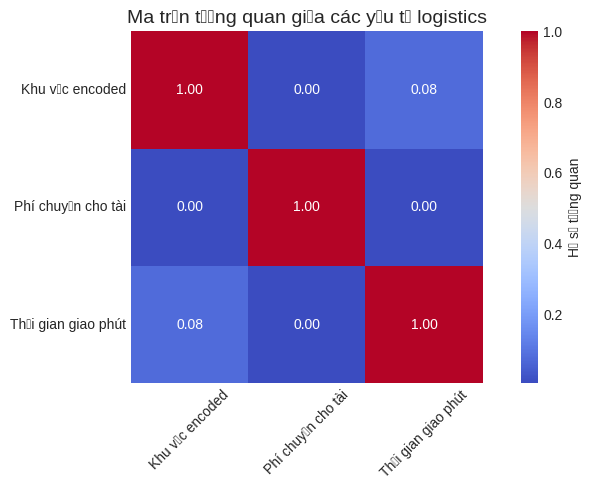

In [ ]:
# Bước 2: Loại bỏ giá trị thiếu
df_corr = df[["Khu vực", "Phí chuyến cho tài", "Thời gian giao phút"]].dropna()

# Bước 3: Mã hóa khu vực (dạng chuỗi) thành số
le = LabelEncoder()
df_corr["Khu vực encoded"] = le.fit_transform(df_corr["Khu vực"])

# Bước 4: Tính ma trận tương quan
corr_matrix = df_corr[["Khu vực encoded", "Phí chuyến cho tài", "Thời gian giao phút"]].corr()

# Bước 5: Vẽ biểu đồ heatmap thể hiện sự tương quan
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True,
            cbar_kws={"label": "Hệ số tương quan"})
plt.title("Ma trận tương quan giữa các yếu tố logistics", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


| Cặp yếu tố                                   | Hệ số tương quan | Nhận xét cụ thể                                                                                                                                                                 |
| -------------------------------------------- | ---------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `khu_vực_encoded` – `phí_chuyến_cho_tài`     | **0.00**         | **Không có tương quan**. Việc định phí không phụ thuộc vào khu vực (hoặc bị kiểm soát, cố định). Đây là điều đáng lưu ý nếu bạn muốn áp dụng định phí linh hoạt theo vùng.      |
| `khu_vực_encoded` – `Thời_gian_giao_phút`    | **0.08**         | **Tương quan rất yếu dương**. Khu vực gần như **không ảnh hưởng rõ rệt** tới thời gian giao hàng. Có thể do quy trình đã được tối ưu đều nhau hoặc do mẫu chưa đủ phân biệt rõ. |
| `phí_chuyến_cho_tài` – `Thời_gian_giao_phút` | **0.00**         | **Không có tương quan**. Thời gian giao không bị ảnh hưởng bởi mức phí. Có thể do phí không phản ánh đúng độ khó hay độ xa của chuyến đi.                                       |

<ipython-input-120-0cef0d50618e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Khu vực', y='Thời gian giao phút', data=df_corr, palette='viridis', showmeans=True)
<ipython-input-120-0cef0d50618e>:9: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-120-0cef0d50618e>:9: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-120-0cef0d50618e>:9: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberati

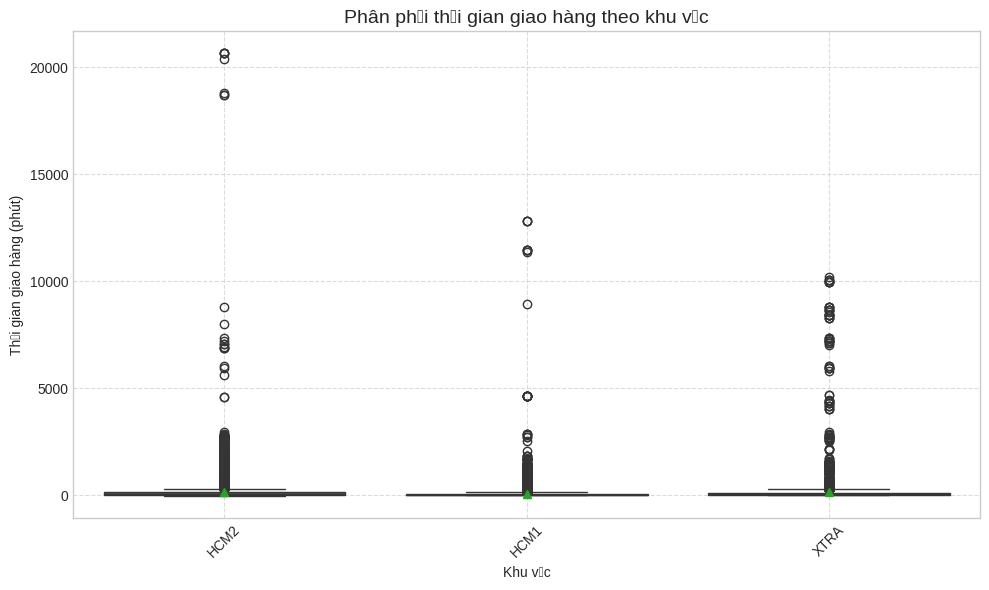

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Khu vực', y='Thời gian giao phút', data=df_corr, palette='viridis', showmeans=True)
plt.title("Phân phối thời gian giao hàng theo khu vực", fontsize=14)
plt.ylabel("Thời gian giao hàng (phút)")
plt.xlabel("Khu vực")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Phân phối thời gian giao hàng:
  - HCM2: Thời gian giao hàng có giá trị trung vị (đường màu xanh lá) nằm ở mức thấp, khoảng dưới 500 phút. Khoảng cách giữa các phần tư (Q1-Q3) khá hẹp, cho thấy dữ liệu tập trung. Tuy nhiên, có một số giá trị ngoại lai (outliers) ở mức cao, lên đến khoảng 2000 phút, cho thấy sự biến động lớn trong một số trường hợp.
  - HCM1: Trung vị thời gian giao hàng cũng nằm dưới 500 phút, tương tự HCM2. Khoảng cách Q1-Q3 rộng hơn một chút so với HCM2, và có ít giá trị ngoại lai hơn, với các điểm cao nhất khoảng 1500 phút.
  XTRA: Trung vị thời gian giao hàng cao hơn một chút so với hai khu vực kia, khoảng 500-1000 phút. Khoảng cách Q1-Q3 rộng hơn, và có nhiều giá trị ngoại lai hơn, với một số điểm vượt 1500 phút, thậm chí gần 2000 phút.
+ So sánh giữa các khu vực:
  - XTRA có xu hướng thời gian giao hàng cao hơn và biến động lớn hơn so với HCM2 và HCM1, có thể do điều kiện giao thông hoặc khoảng cách xa hơn.
  - HCM2 và HCM1 có phân phối tương đối tương đồng, với thời gian giao hàng trung bình thấp hơn và ít biến động hơn so với XTRA.
+ Giá trị ngoại lai:
  - Tất cả ba khu vực đều có các giá trị ngoại lai đáng kể, đặc biệt ở HCM2 và XTRA, với một số điểm vượt quá 1500-2000 phút. Điều này có thể do các yếu tố như giao hàng đặc biệt, sự cố, hoặc lỗi dữ liệu cần kiểm tra thêm.

Outliers thời gian giao hàng:
      Khu vực  Phí chuyến cho tài  Thời gian giao phút
32       HCM2              8000.0           286.983333
47       HCM2              8000.0           307.033333
48       HCM2              8000.0           307.600000
49       HCM2              8000.0           304.250000
50       HCM2              8000.0           303.916667
...       ...                 ...                  ...
96653    HCM2              7500.0           976.950000
96657    HCM2              7500.0          1081.800000
96659    HCM2              7500.0          1116.683333
96660    HCM2             15000.0          1123.450000
96661    HCM2              7500.0          1125.283333

[8367 rows x 3 columns]


<ipython-input-121-e9149fe9b0f7>:31: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-121-e9149fe9b0f7>:31: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-121-e9149fe9b0f7>:31: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-121-e9149fe9b0f7>:31: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-121-e9149fe9b0f7>:31: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-121-e9149fe9b0f7>:31: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation

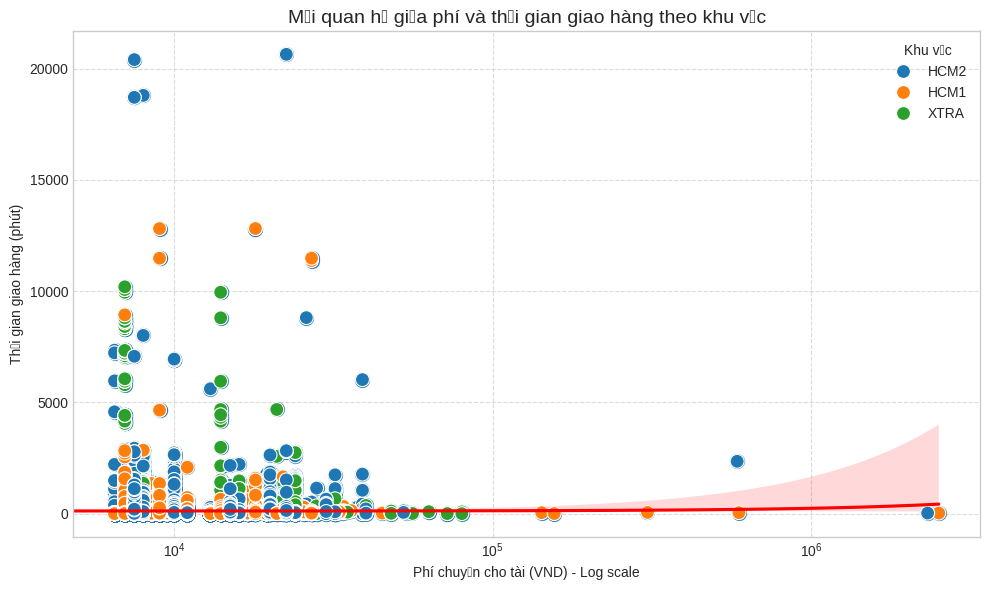

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
# Tìm outliers trong thời gian giao hàng
outliers_time = detect_outliers(df_corr, 'Thời gian giao phút')
print("Outliers thời gian giao hàng:")
print(outliers_time[['Khu vực', 'Phí chuyến cho tài', 'Thời gian giao phút']])


# Gợi ý xử lý: Thêm cột 'ly_do_ngoai_lai' để ghi nhận nguyên nhân (có thể thủ công hoặc dựa trên logic)
df_corr['ly do ngoai lai'] = np.where(df_corr['Thời gian giao phút'] > 10000,
                                     'Giao hàng khẩn cấp hoặc lỗi hệ thống',
                                     'Bình thường')

# Vẽ scatter plot với đường hồi quy
plt.figure(figsize=(10, 6))
sns.regplot(data=df_corr, x="Phí chuyến cho tài", y="Thời gian giao phút",
            scatter_kws={'s': 100}, line_kws={'color': 'red'})
sns.scatterplot(data=df_corr, x="Phí chuyến cho tài", y="Thời gian giao phút", hue="Khu vực", palette="tab10", s=100)
plt.xscale('log')
plt.title("Mối quan hệ giữa phí và thời gian giao hàng theo khu vực", fontsize=14)
plt.xlabel("Phí chuyến cho tài (VND) - Log scale")
plt.ylabel("Thời gian giao hàng (phút)")
plt.legend(title="Khu vực")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Đường hồi quy (Regression Line):
Đường hồi quy cho thấy một xu hướng giảm nhẹ: khi phí chuyến cho tài (VND) tăng, thời gian giao hàng (phút) có xu hướng giảm. Tuy nhiên, độ dốc của đường rất nhỏ, cho thấy mối quan hệ giữa phí và thời gian giao hàng không mạnh.
Vùng màu hồng xung quanh đường hồi quy (khoảng tin cậy) khá rộng, đặc biệt ở các mức phí cao (10⁵ đến 10⁶ VND), điều này cho thấy độ biến thiên lớn và mối quan hệ giữa hai biến không rõ ràng.
- Phân bố dữ liệu theo khu vực:
    - HCM2 (xanh dương): Đa số dữ liệu tập trung ở phí thấp (khoảng 10⁴ đến 10⁵ VND) với thời gian giao hàng dao động từ 0 đến 5000 phút. Có một số điểm ngoại lai với phí cao (gần 10⁶ VND) và thời gian giao khoảng 15000-20000 phút, cho thấy sự biến động lớn.
    - HCM1 (cam): Dữ liệu phân bố rộng hơn, từ phí 10⁴ đến 10⁶ VND. Thời gian giao hàng chủ yếu dưới 5000 phút, nhưng có một số điểm ngoại lai ở phí cao (10⁶ VND) với thời gian giao lên đến 20000 phút. Một điểm đáng chú ý là tại phí thấp (10⁴ VND), thời gian giao có xu hướng cao hơn so với HCM2.
    - XTRA (màu xanh lá): Phí chủ yếu nằm trong khoảng 10⁴ đến 10⁵ VND, với thời gian giao hàng tập trung dưới 5000 phút. Tuy nhiên, có một số điểm ngoại lai với phí cao (10⁶ VND) và thời gian giao vượt 15000 phút, tương tự hai khu vực kia.
- Mối quan hệ giữa phí và thời gian giao:
    - Nhìn chung, không có xu hướng rõ ràng giữa phí chuyến và thời gian giao hàng. Các điểm phân bố rải rác, với cả phí thấp và cao đều có thể đi kèm thời gian giao ngắn hoặc dài.
    - Ở mức phí thấp (10⁴ VND), thời gian giao có xu hướng dao động mạnh (0-5000 phút), đặc biệt ở HCM1 và XTRA.
    - Ở mức phí cao (10⁶ VND), thời gian giao thường lớn hơn (10000-20000 phút), nhưng số lượng dữ liệu rất hạn chế, chủ yếu là outliers.
+ So sánh giữa các khu vực:
  - HCM1 có xu hướng có nhiều điểm với phí cao hơn (gần 10⁶ VND) so với HCM2 và XTRA, kèm theo thời gian giao dài hơn.
  - XTRA và HCM2 có phân bố phí và thời gian giao tương đối tương đồng, với phần lớn dữ liệu ở mức phí trung bình (10⁴-10⁵ VND) và thời gian giao dưới 5000 phút.
  - HCM2 dường như có ít biến động hơn ở phí thấp, trong khi XTRA có nhiều điểm thời gian giao cao hơn ở cùng mức phí.
+ Đặc điểm ngoại lai:
  - Các điểm ngoại lai với thời gian giao trên 15000 phút và phí khoảng 10⁶ VND xuất hiện ở cả ba khu vực, có thể do các đơn hàng đặc biệt, lỗi dữ liệu, hoặc điều kiện giao hàng bất thường.
  - HCM1 và XTRA có nhiều outliers hơn so với HCM2, đặc biệt ở phí cao.

### **2.2.4. Phân tích thông tin về địa chỉ giao hàng**

<ipython-input-122-b87c1dea8f5f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=top_delivery.values, y=formatted_indices, palette=custom_blue)
<ipython-input-122-b87c1dea8f5f>:56: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-122-b87c1dea8f5f>:56: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-122-b87c1dea8f5f>:56: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-122-b87c1dea8f5f>:56: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-122-b87c1d

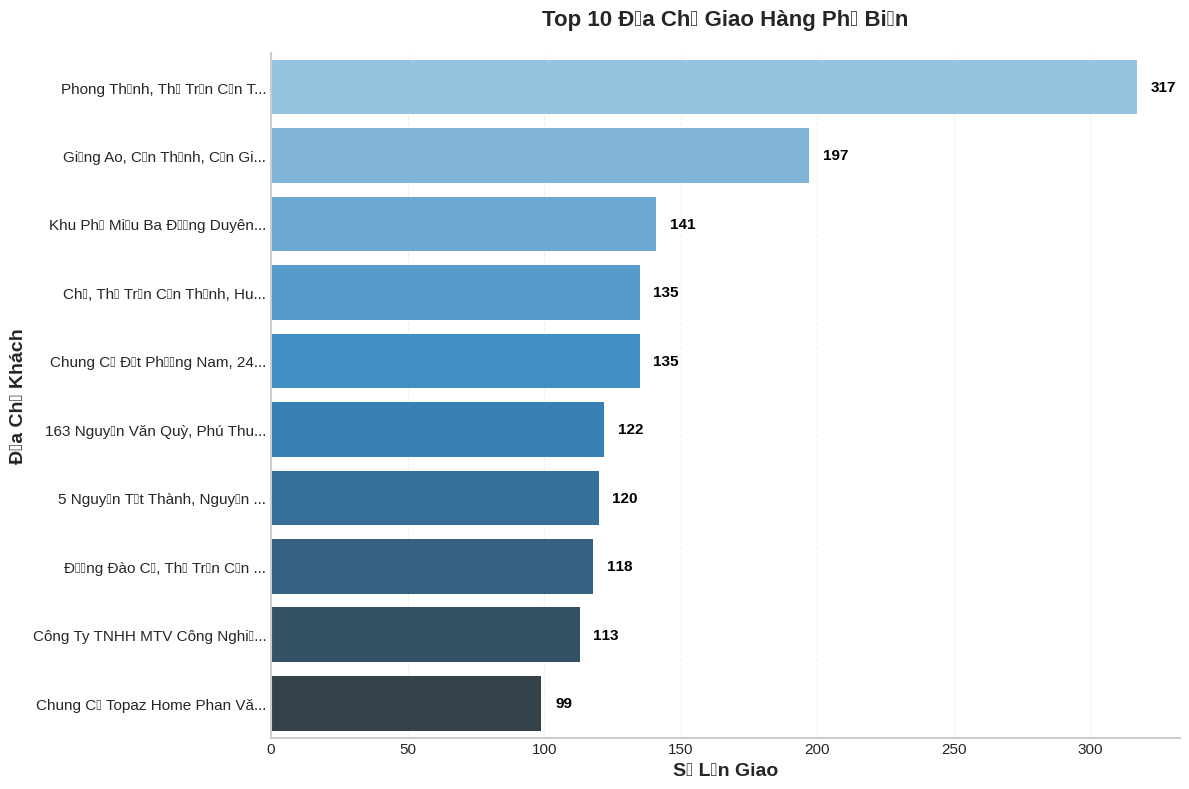

In [ ]:
orders_per_day = df.groupby(df['Ngày tạo đơn'].dt.date).size()
value_by_area = df.groupby('Khu vực')['Giá trị đơn hàng'].sum().sort_values(ascending=False)
avg_delivery_by_market = df.groupby('Siêu thị')['Thời gian giao hàng'].mean().dropna().sort_values(ascending=False)
top_pickup = df['Địa chỉ lấy hàng'].value_counts().head(10)
# Top 10 địa chỉ giao hàng phổ biến
top_delivery = df['Địa chỉ khách'].value_counts().head(10)
# Top 10 địa chỉ lấy hàng phổ biến
top_pickup = df['Địa chỉ lấy hàng'].value_counts().head(10)


# Tùy chỉnh màu sắc và style
plt.style.use('seaborn-v0_8-whitegrid')
custom_blue = sns.color_palette("Blues_d", 10)
custom_green = sns.color_palette("Greens_d", 10)


# Định dạng text cho các địa chỉ dài
def format_address(address, max_length=30):
    if len(address) > max_length:
        return address[:max_length-3] + '...'
    return address


# Vẽ biểu đồ cho địa chỉ giao hàng
plt.figure(figsize=(12, 8))
formatted_indices = [format_address(addr) for addr in top_delivery.index]
ax1 = sns.barplot(x=top_delivery.values, y=formatted_indices, palette=custom_blue)


# Thêm giá trị vào thanh và làm đẹp
for i, (p, val) in enumerate(zip(ax1.patches, top_delivery.values)):
    width = p.get_width()
    ax1.text(width + 5, p.get_y() + p.get_height()/2, f'{int(val):,}',
             ha='left', va='center', fontsize=11, color='black', fontweight='bold')
    # Tạo màu gradient cho các thanh
    p.set_facecolor(custom_blue[i])


# Cải thiện tiêu đề và nhãn
plt.title("Top 10 Địa Chỉ Giao Hàng Phổ Biến", fontsize=16, weight='bold', pad=20)
plt.xlabel("Số Lần Giao", fontsize=14, weight='bold')
plt.ylabel("Địa Chỉ Khách", fontsize=14, weight='bold')


# Tùy chỉnh lưới và viền
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)


# Tùy chỉnh các ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('top_delivery_addresses.png', dpi=300, bbox_inches='tight')
plt.show()


Dựa vào biểu đồ ta có thể thấy sự phân bố không đều:
  - Địa chỉ đứng đầu "Phong Thạnh, Thị Trấn Cần Thạnh..." với 317 lần giao hàng nổi bật hơn hẳn các địa chỉ khác
  - Vị trí thứ 2 "Giồng Ao, Cần Thạnh, Cần Giờ..." có 197 lần giao, tạo ra khoảng cách lớn với vị trí đầu tiên

Nhóm địa điểm tập trung:
  - Nhiều địa chỉ nằm ở khu vực Cần Thạnh, Cần Giờ xuất hiện trong top 10
Có sự đa dạng về loại hình địa điểm: chung cư, phố, đường, và cả địa điểm doanh nghiệp

Phân vùng theo số lượng:
  - Top 2 địa chỉ (317 và 197) thuộc nhóm cao nhất

Nhóm trung bình từ 113-141 lần giao
- Địa chỉ thấp nhất "Chung Cư Topaz Home" chỉ có 99 lần giao

<ipython-input-123-2dad4dc65f48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=top_pickup.values, y=formatted_pickup_indices, palette=custom_green)
<ipython-input-123-2dad4dc65f48>:29: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-123-2dad4dc65f48>:29: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-123-2dad4dc65f48>:29: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-123-2dad4dc65f48>:29: UserWarning: Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython

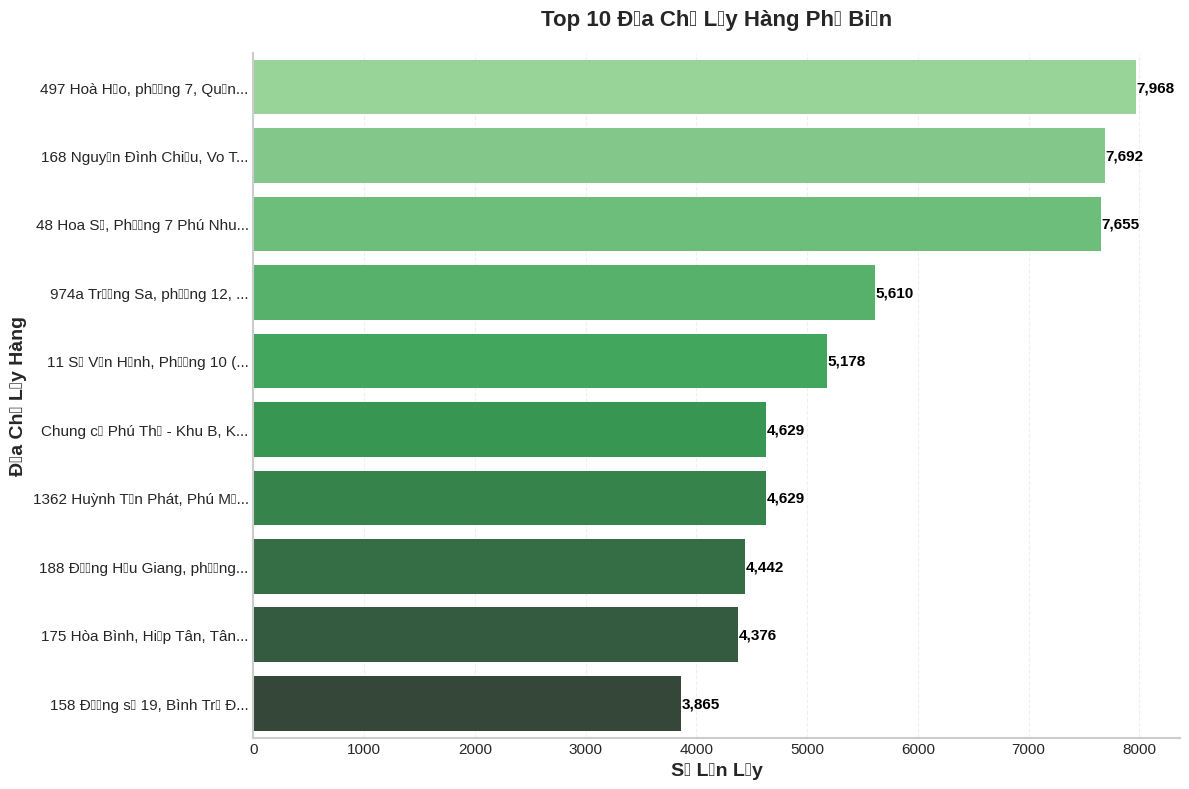

In [ ]:
# Vẽ biểu đồ cho địa chỉ lấy hàng
plt.figure(figsize=(12, 8))
formatted_pickup_indices = [format_address(addr) for addr in top_pickup.index]
ax2 = sns.barplot(x=top_pickup.values, y=formatted_pickup_indices, palette=custom_green)

# Thêm giá trị vào thanh và làm đẹp
for i, (p, val) in enumerate(zip(ax2.patches, top_pickup.values)):
    width = p.get_width()
    ax2.text(width + 5, p.get_y() + p.get_height()/2, f'{int(val):,}',
             ha='left', va='center', fontsize=11, color='black', fontweight='bold')
    # Tạo màu gradient cho các thanh
    p.set_facecolor(custom_green[i])

# Cải thiện tiêu đề và nhãn
plt.title("Top 10 Địa Chỉ Lấy Hàng Phổ Biến", fontsize=16, weight='bold', pad=20)
plt.xlabel("Số Lần Lấy", fontsize=14, weight='bold')
plt.ylabel("Địa Chỉ Lấy Hàng", fontsize=14, weight='bold')

# Tùy chỉnh lưới và viền
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

# Tùy chỉnh các ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('top_pickup_addresses.png', dpi=300, bbox_inches='tight')
plt.show()


Chênh lệch đáng kể về số lượng:
  - Top 3 địa chỉ có số lượng lấy hàng cực kỳ cao (trên 7,600 lần), cao hơn nhiều so với các địa điểm còn lại
  - Khoảng cách giữa top 3 và vị trí thứ 4 rất lớn (từ 7,655 xuống 5,610)

Phân bố địa lý:
  - Đa dạng về khu vực: Quận 10, Phường 7, Phú Nhuận, Bình Trị Đông...
  - Nhiều điểm lấy hàng tập trung ở các quận trung tâm của thành phố

Tính chất địa điểm:
  - Hầu hết là địa chỉ cụ thể kèm số nhà, không phải khu thương mại lớn. Có cả chung cư (Chung cư Phú Thọ) trong danh sách

Nhóm số lượng:
  - Nhóm siêu cao: 3 địa điểm đầu (trên 7,600 lần)
  - Nhóm cao: vị trí 4-5 (khoảng 5,100-5,600 lần)
  - Nhóm trung bình: vị trí 6-9 (khoảng 4,300-4,600 lần)
  - Nhóm thấp nhất: vị trí 10 (3,865 lần)

Các điểm đáng chú ý
  - Tập trung nguồn hàng:
    + Địa chỉ "497 Hòa Hảo, phường 7, Quận..." là nguồn lấy hàng lớn nhất với 7,968 lần
    + Có thể là trung tâm phân phối hoặc kho hàng chính của hệ thống

  - Sự tương đồng số lượng:
    + Hai địa điểm ("Chung cư Phú Thọ" và "1362 Huỳnh Tấn Phát") có cùng số lượng chính xác (4,629 lần lấy)
    + Điều này có thể đáng được điều tra thêm - liệu có phải trùng hợp hay có yếu tố liên quan

Sự chênh lệch:
  - Khoảng cách giữa địa điểm cao nhất và thấp nhất là hơn 4,000 lần lấy hàng.Điều này cho thấy sự phân bố không đều của các điểm lấy hàng

## **2.3. Phân tích theo hành vi khách hàng và trạng thái đơn hàng**

### **2.3.1. Phân tích tỷ lệ hủy đơn hàng**

#### **2.3.1.1. Phân Tích Số Đơn Hàng Theo Trạng Thái và Khu Vực**

<ipython-input-124-9b62736b889a>:28: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-124-9b62736b889a>:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-124-9b62736b889a>:28: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-124-9b62736b889a>:28: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-124-9b62736b889a>:28: UserWarning: Glyph 7844 (\N{LATIN CAPITAL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-124-9b62736b889a>:28: UserWarning: Glyph 7840 (\N{LATIN CAPITAL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()

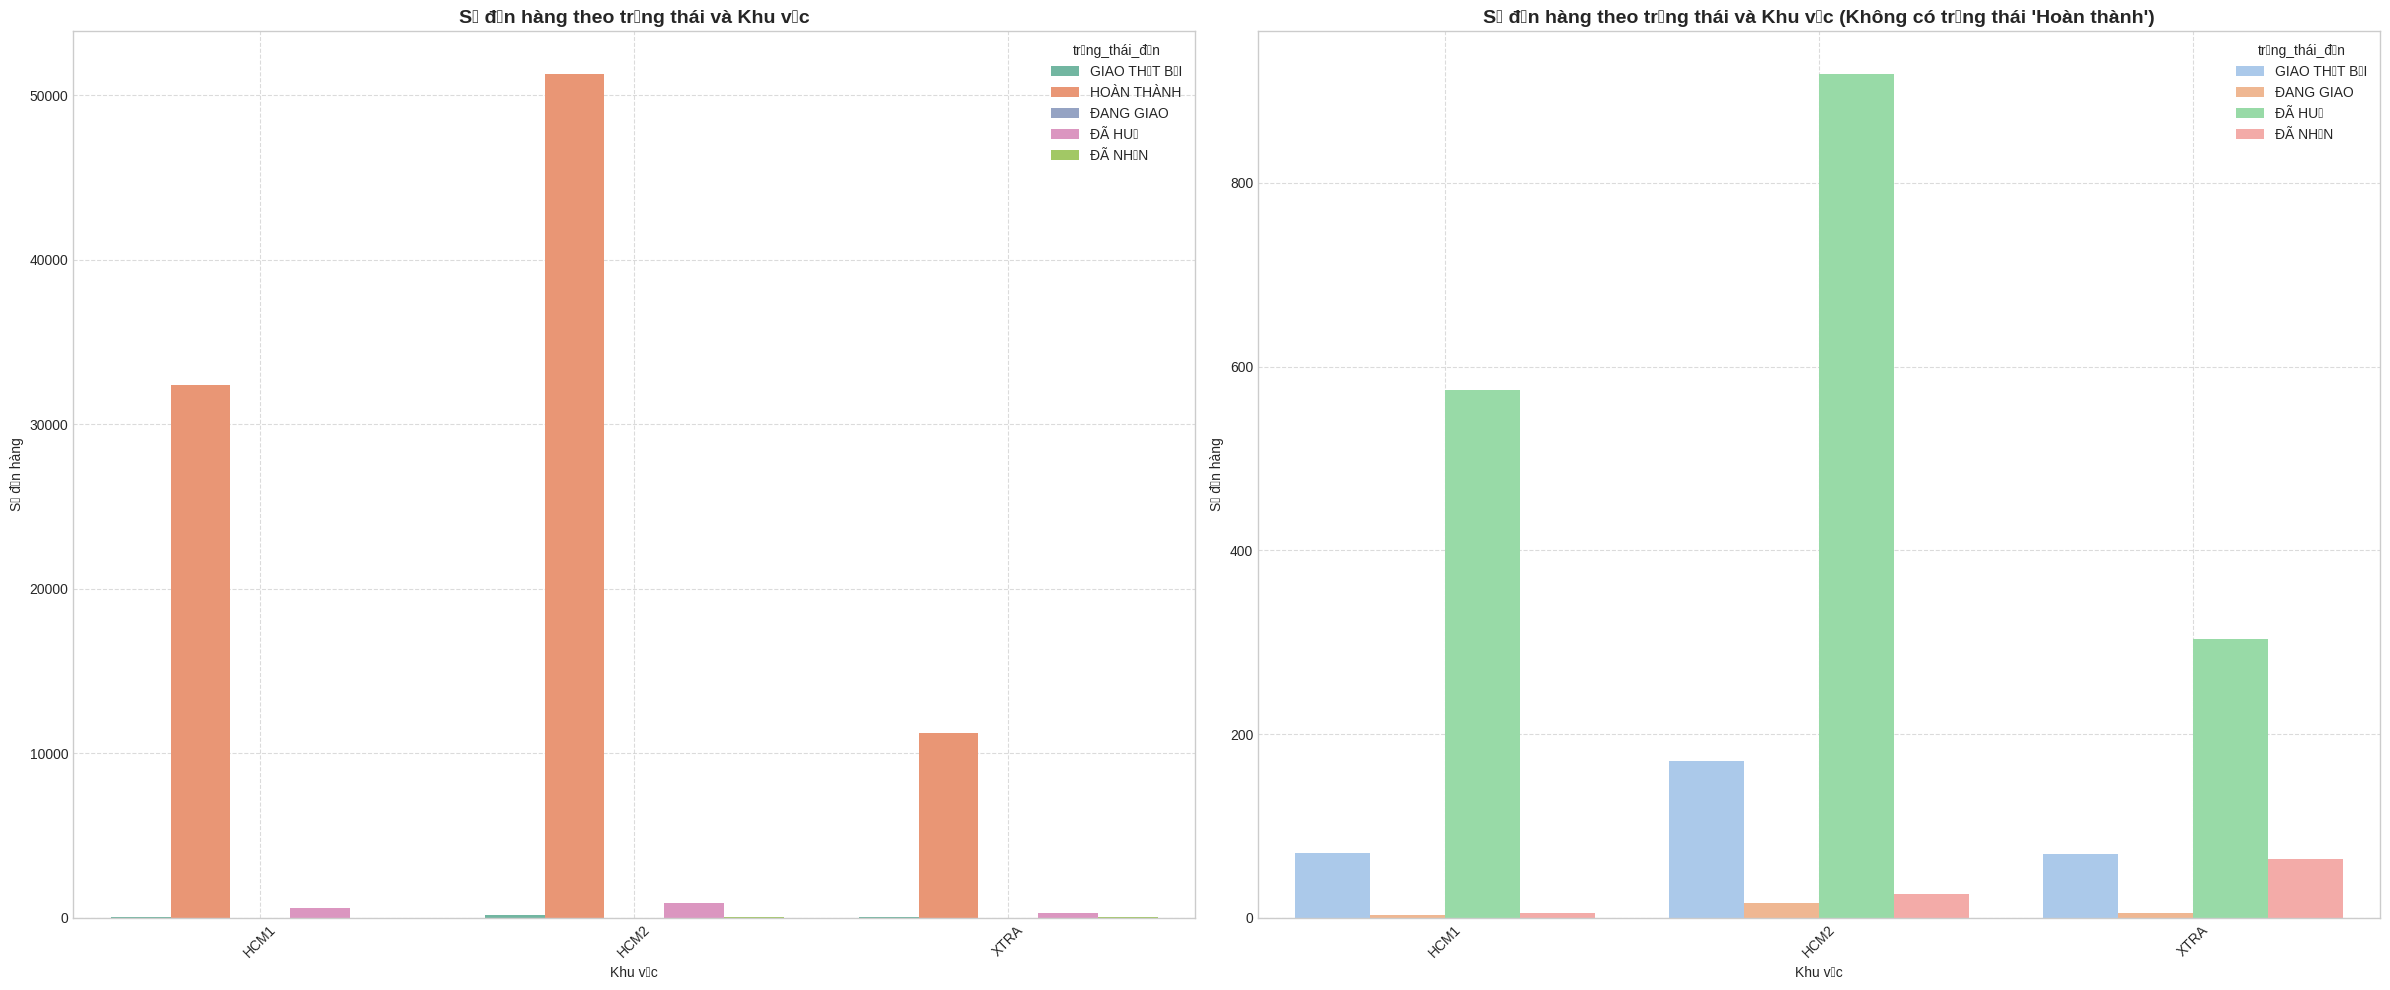

In [ ]:
# Xóa dòng thiếu thông tin cần thiết
df_clean = df.dropna(subset=['Khu vực', 'trạng_thái_đơn'])
# Tính số đơn theo Khu vực và trạng thái
status_counts = df_clean.groupby(['Khu vực', 'trạng_thái_đơn']).size().reset_index(name='số_đơn')
# Tạo một figure duy nhất chứa cả 2 biểu đồ
fig, axs = plt.subplots(1, 2, figsize=(24, 10))
# Biểu đồ đầu tiên: Số đơn hàng theo trạng thái và Khu vực
sns.barplot(data=status_counts, x='Khu vực', y='số_đơn', hue='trạng_thái_đơn', palette='Set2', ax=axs[0])
axs[0].set_title("Số đơn hàng theo trạng thái và Khu vực", fontsize=14, weight='bold')
axs[0].set_xlabel("Khu vực")
axs[0].set_ylabel("Số đơn hàng")
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(True, linestyle='--', alpha=0.7)
# Xử lý lại dữ liệu: Loại bỏ các trạng thái có "HOÀN THÀNH"
df_clean['trạng_thái_đơn'] = df_clean['trạng_thái_đơn'].str.upper().str.strip()
df_clean = df_clean[~df_clean['trạng_thái_đơn'].str.contains('HOÀN THÀNH')]
# Tính lại số đơn sau khi loại bỏ trạng thái "HOÀN THÀNH"
status_counts_filtered = df_clean.groupby(['Khu vực', 'trạng_thái_đơn']).size().reset_index(name='số_đơn')

# Biểu đồ thứ hai: Số đơn hàng theo trạng thái và Khu vực (Không có trạng thái 'HOÀN THÀNH')
sns.barplot(data=status_counts_filtered, x='Khu vực', y='số_đơn', hue='trạng_thái_đơn', palette='pastel', ax=axs[1])
axs[1].set_title("Số đơn hàng theo trạng thái và Khu vực (Không có trạng thái 'Hoàn thành')", fontsize=14, weight='bold')
axs[1].set_xlabel("Khu vực")
axs[1].set_ylabel("Số đơn hàng")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True, linestyle='--', alpha=0.7)
# Hiển thị tất cả biểu đồ trong một hình ảnh
plt.tight_layout()
plt.show()

Phân Tích Số Đơn Hàng Theo Trạng Thái và Khu Vực
- Tổng số đơn hàng theo khu vực và trạng thái chính:
  - HCM1: Tổng số đơn hàng là 32,404 (Hoàn thành: 32,404, Đã hủy: 71, Đang giao: 3).Trạng thái "Hoàn thành" chiếm gần 100% (32,404 đơn), trong khi "Đã hủy" và "Đang giao" rất thấp (71 và 3 đơn).  
  - HCM2: Tổng số đơn hàng cao nhất với 51,307 (Hoàn thành: 51,307, Đã hủy: 575, Đang giao: 171, Đã nhận: 5)."Hoàn thành" vẫn chiếm ưu thế tuyệt đối (51,307 đơn), các trạng thái khác rất nhỏ (Đã hủy: 575, Đang giao: 171, Đã nhận: 5).  
  - XTRA: Tổng số đơn hàng là 11,231 (Hoàn thành: 11,231, Đã hủy: 70, Đang giao: 5, Đã nhận: 64, Giao thất bại: 303).Tương tự, "Hoàn thành" chiếm gần hết (11,231 đơn), các trạng thái khác nhỏ (Giao thất bại: 303, Đã nhận: 64, Đã hủy: 70, Đang giao: 5).

- Phân bố trạng thái đơn hàng:

  - Hoàn thành (màu cam): Là trạng thái áp đảo ở cả ba khu vực, với tỷ lệ gần 100% (HCM1: 99.78%, HCM2: 99.02%, XTRA: 97.28%).Điều này cho thấy hệ thống giao hàng hoạt động hiệu quả.  
  - Đã hủy (màu tím): Số lượng thấp, lần lượt là 71 (HCM1), 575 (HCM2), 70 (XTRA).HCM2 có số lượng "Đã hủy" cao nhất (575 đơn, 1.12%), có thể do khối lượng đơn hàng lớn hơn.  
  - Đang giao (màu xanh dương): Rất ít, với 3 (HCM1), 171 (HCM2), 5 (XTRA).HCM2 có số "Đang giao" cao nhất (171 đơn, 0.33%), nhưng vẫn không đáng kể so với "Hoàn thành".  
  - Đã nhận (màu xanh lá): Chỉ xuất hiện ở HCM2 (5 đơn) và XTRA (64 đơn), với tỷ lệ rất nhỏ (HCM2: 0.01%, XTRA: 0.57%).  
  - Giao thất bại (màu nâu): Chỉ xuất hiện ở XTRA (303 đơn, 2.62%), cho thấy khu vực này có tỷ lệ giao thất bại cao hơn các khu vực khác (HCM1 và HCM2 gần như không có).

- So sánh giữa các khu vực:

  - HCM2 có số đơn hàng lớn nhất (51,307), nhưng cũng có số "Đã hủy" và "Đang giao" cao nhất (575 và 171), có thể do khối lượng đơn hàng lớn dẫn đến nhiều biến động.  
  - HCM1 có 32,404 đơn, với tỷ lệ "Hoàn thành" gần 100% (99.78%), ít biến động hơn HCM2.  
  - XTRA có số đơn thấp nhất (11,231), nhưng là khu vực duy nhất có "Giao thất bại" đáng kể (303 đơn, 2.62%), cho thấy có vấn đề trong quy trình giao hàng tại khu vực này.

- Đặc điểm và xu hướng:
  - Hệ thống giao hàng hoạt động rất hiệu quả, với tỷ lệ "Hoàn thành" gần 100% ở cả ba khu vực.  
  - XTRA có tỷ lệ "Giao thất bại" cao nhất (2.62%), cần xem xét nguyên nhân (có thể do khoảng cách, điều kiện giao thông, hoặc quy trình xử lý).  
  - Số lượng "Đang giao" và "Đã nhận" rất thấp, có thể do dữ liệu chưa được cập nhật kịp thời hoặc quy trình tự động hóa.

<ipython-input-125-c3fedcfda1ec>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_stats, x='Khu vực', y='tỷ_lệ_hủy_%', palette='Reds_r')
<ipython-input-125-c3fedcfda1ec>:23: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-125-c3fedcfda1ec>:23: UserWarning: Glyph 7927 (\N{LATIN SMALL LETTER Y WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-125-c3fedcfda1ec>:23: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-125-c3fedcfda1ec>:23: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-125-c3fedc

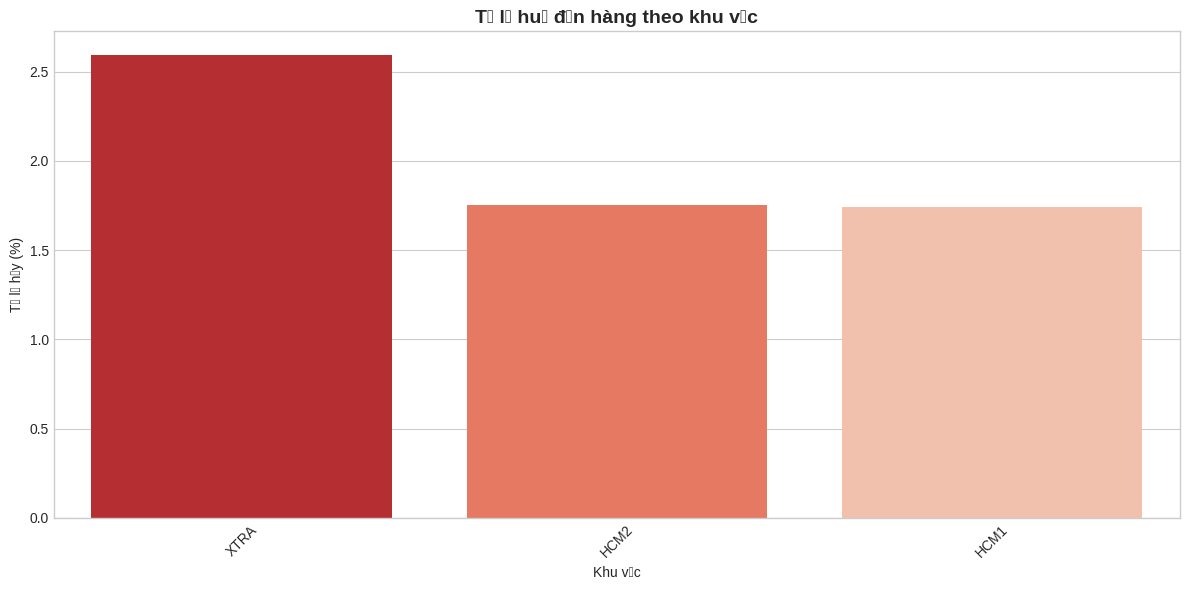

In [ ]:

# Tạo cột đánh dấu đơn bị huỷ
df['is_cancelled'] = df['trạng_thái_đơn'].astype(str).str.contains("huỷ", case=False, na=False)

# Tính tổng đơn và đơn huỷ theo khu vực
cancel_stats = df.groupby('Khu vực')['is_cancelled'].agg(['sum', 'count'])

# Đổi tên các cột cho rõ ràng hơn
cancel_stats.rename(columns={'sum': 'số_đơn_hủy', 'count': 'tổng_đơn'}, inplace=True)

# Tính tỷ lệ huỷ đơn hàng
cancel_stats['tỷ_lệ_hủy_%'] = (cancel_stats['số_đơn_hủy'] / cancel_stats['tổng_đơn']) * 100

# Sắp xếp tỷ lệ huỷ theo khu vực giảm dần
cancel_stats = cancel_stats.reset_index().sort_values('tỷ_lệ_hủy_%', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=cancel_stats, x='Khu vực', y='tỷ_lệ_hủy_%', palette='Reds_r')
plt.title("Tỷ lệ huỷ đơn hàng theo khu vực", fontsize=14, weight='bold')
plt.ylabel("Tỷ lệ hủy (%)")
plt.xlabel("Khu vực")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **2.3.1.2. Tỷ lệ hủy đơn theo giá trị đơn hàng**

In [ ]:
# 1. Chuẩn bị dữ liệu hủy đơn bằng cách lọc các đơn đã hủy
is_canceled =  df[df['trạng_thái_đơn'] == 'ĐÃ HUỶ']
# Đếm số đơn bị hủy
canceled_count = len(is_canceled)

# In số đơn bị hủy
print(f"Tổng số đơn bị hủy: {canceled_count}")
# Phân nhóm giá trị đơn hàng thành các phân khúc
bins = [10000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 61000000]
labels = ['10k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-61M']

# Tạo cột phân nhóm giá trị đơn hàng
df['order_value_group'] = pd.cut(df['Giá trị đơn hàng'], bins=bins, labels=labels, right=True)
# Calculate total orders by order value group
total_by_value = df.groupby('order_value_group').size().reset_index(name='Tổng số đơn')

# Tính số đơn hàng bị hủy theo phân khúc giá trị đơn hàng
canceled_by_value = is_canceled.groupby('order_value_group').size().reset_index(name='Số đơn hủy')

# Gộp hai DataFrame lại với nhau
cancellation_by_order_value = pd.merge(total_by_value, canceled_by_value, on='order_value_group', how='left')

# Tinh tỷ lệ hủy đơn hàng theo phân khúc giá trị đơn hàng
cancellation_by_order_value['Tỷ lệ hủy đơn'] = (cancellation_by_order_value['Số đơn hủy'] / cancellation_by_order_value['Tổng số đơn']).round(4)

# Đổi tên cột cho dễ đọc
cancellation_by_order_value = cancellation_by_order_value.rename(columns={'order_value_group': 'Phân khúc giá'})

print("\nTỷ lệ hủy đơn theo giá trị đơn hàng:")
print(cancellation_by_order_value)

Tổng số đơn bị hủy: 1797

Tỷ lệ hủy đơn theo giá trị đơn hàng:
  Phân khúc giá  Tổng số đơn  Số đơn hủy  Tỷ lệ hủy đơn
0      10k-100k          474          16         0.0338
1     100k-500k        17049         263         0.0154
2       500k-1M        23762         376         0.0158
3         1M-5M        50999         971         0.0190
4        5M-10M         3257         103         0.0316
5       10M-50M         1452          58         0.0399
6       50M-61M           17           0         0.0000


<ipython-input-126-443176193615>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_value = df.groupby('order_value_group').size().reset_index(name='Tổng số đơn')
<ipython-input-126-443176193615>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  canceled_by_value = is_canceled.groupby('order_value_group').size().reset_index(name='Số đơn hủy')


<ipython-input-127-95c40f44db73>:15: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-127-95c40f44db73>:15: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-127-95c40f44db73>:15: UserWarning: Glyph 7927 (\N{LATIN SMALL LETTER Y WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-127-95c40f44db73>:15: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-127-95c40f44db73>:15: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7927 (\N{LATIN SMALL LETTER Y WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  

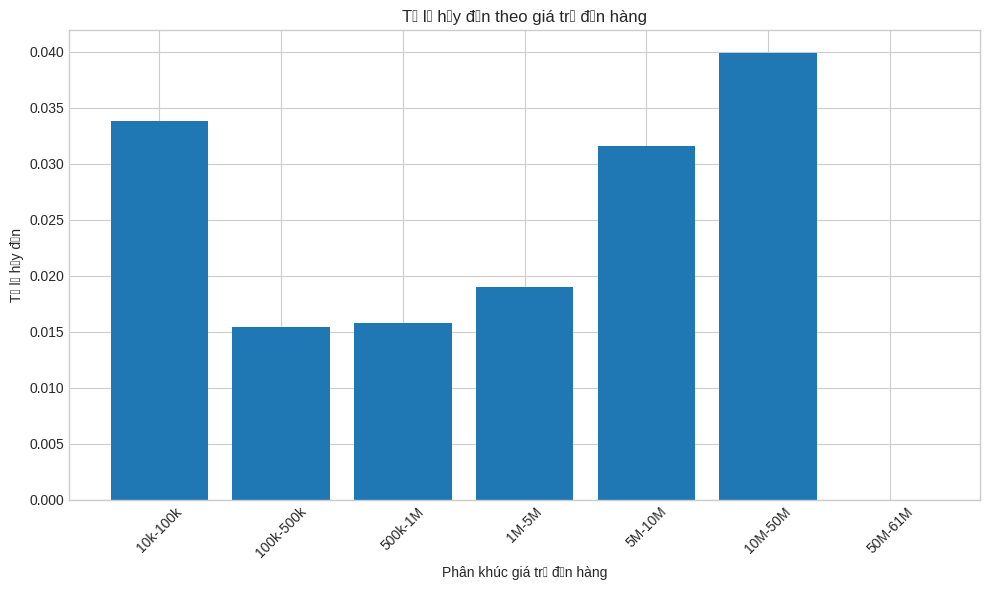

In [ ]:


x = cancellation_by_order_value['Phân khúc giá']
y = cancellation_by_order_value['Tỷ lệ hủy đơn']


# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title('Tỷ lệ hủy đơn theo giá trị đơn hàng')
plt.xlabel('Phân khúc giá trị đơn hàng')
plt.ylabel('Tỷ lệ hủy đơn')


# Xoay nhãn trục X
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Nhận xét tỷ lệ hủy đơn theo giá trị đơn hàng**
- Đơn hàng giá trị thấp (10k–100k) và cao (trên 10M) có tỷ lệ hủy cao.
Lý do có thể do:
- Khách hàng ít cam kết với đơn nhỏ hoặc kỳ vọng cao với đơn lớn.
- Shipper không nhận đơn giá trị thấp hoặc đơn hàng lớn yêu cầu xử lý đặc biệt.

#### **2.3.1.3. Top 10 lý do hủy đơn nhiều nhất**

<ipython-input-128-7fd886ce8b2a>:38: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-128-7fd886ce8b2a>:38: UserWarning: Glyph 7885 (\N{LATIN SMALL LETTER O WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-128-7fd886ce8b2a>:38: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-128-7fd886ce8b2a>:38: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-128-7fd886ce8b2a>:38: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-128-7fd886ce8b2a>:38: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipytho

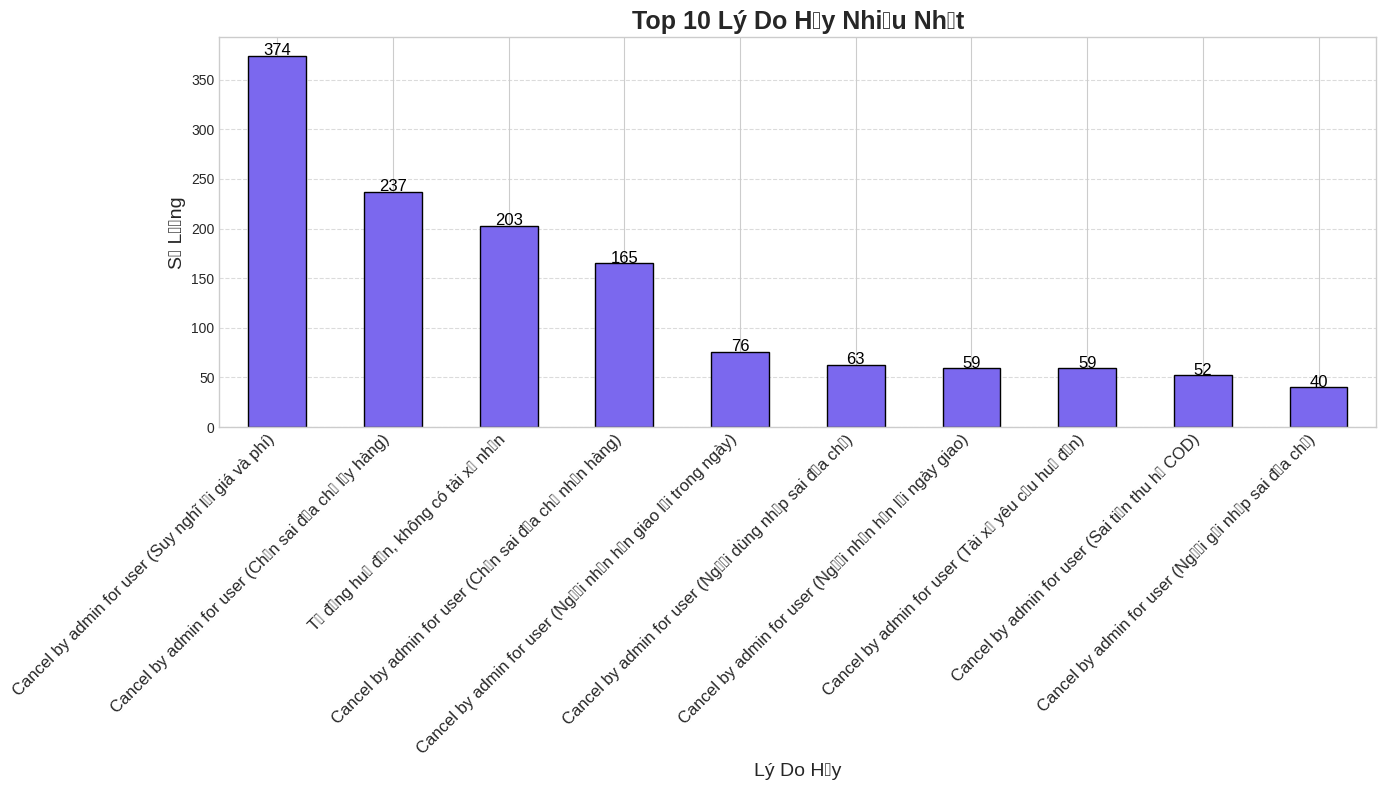

In [ ]:
# Lọc dữ liệu các đơn hàng có trạng thái là "ĐÃ HUỶ"
df_cancelled = df[df['trạng_thái_đơn'] == 'ĐÃ HUỶ']


# Loại bỏ các dòng thiếu lý do hủy
df_cancelled = df_cancelled.dropna(subset=['ly_do_huy'])


# Nhóm theo lý do hủy và đếm số lần xuất hiện
cancel_reasons = df_cancelled['ly_do_huy'].value_counts().head(10)


# Vẽ biểu đồ cột cho 10 lý do hủy phổ biến nhất
plt.figure(figsize=(14, 8))  # Kích thước biểu đồ
ax = cancel_reasons.plot(kind='bar', color='mediumslateblue', edgecolor='black')  # Biểu đồ cột


# Thêm tiêu đề và nhãn cho các trục với kích thước và kiểu chữ cải thiện
plt.title('Top 10 Lý Do Hủy Nhiều Nhất', fontsize=18, fontweight='bold')  # Tiêu đề
plt.xlabel('Lý Do Hủy', fontsize=14)  # Nhãn trục X
plt.ylabel('Số Lượng', fontsize=14)  # Nhãn trục Y


# Xoay nhãn trục X để dễ đọc hơn
plt.xticks(rotation=45, ha='right', fontsize=12)


# Tùy chỉnh lưới cho trục Y
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Thêm giá trị vào trên các cột
for i, v in enumerate(cancel_reasons):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=12, color='black')


# Điều chỉnh không gian bố cục cho đẹp mắt
plt.tight_layout()


# Hiển thị biểu đồ
plt.show()


Biểu đồ cột thể hiện Top 10 lý do hủy đơn hàng (biểu đồ doc) với số lượng đơn bị hủy tương ứng, cùng với các nhận xét chi tiết:

- Phân bố số lượng đơn hủy theo lý do:
  - Cancel by admin for user (số lỗi giao viên): Đứng đầu với 374 đơn, chiếm tỷ lệ cao nhất, cho thấy đây là lý do phổ biến nhất, có thể liên quan đến lỗi từ phía giao viên.
  - Cancel by admin (chưa sai địa chỉ lấy hàng): Thứ hai với 237 đơn, giảm nhẹ so với lý do đầu tiên, có thể do admin hủy do chưa xác định chính xác địa chỉ lấy hàng.
  - Cancel by admin for user (đơn không xác nhận): Thứ ba với 203 đơn, cho thấy một phần không nhỏ các đơn bị hủy do người dùng không xác nhận.
  - Cancel by admin (hàng hóa bị hỏng): Thứ tư với 165 đơn, phản ánh vấn đề chất lượng hàng hóa là một nguyên nhân đáng kể.
  - Cancel by admin for user (hàng hóa không rõ ràng): Thứ năm với 76 đơn, ít hơn đáng kể, có thể do thông tin hàng hóa không đầy đủ.
  - Cancel by admin (hàng hóa sai địa chỉ giao): Thứ sáu với 63 đơn, cho thấy lỗi địa chỉ giao hàng cũng là một yếu tố.
  - Cancel by admin for user (hàng hóa chưa sẵn sàng): Thứ bảy với 59 đơn, phản ánh tình trạng hàng chưa sẵn sàng khi giao.
  - Cancel by admin (hàng hóa bị hủy do lỗi giao viên): Thứ tám với 59 đơn, tương đương lý do thứ bảy, tiếp tục chỉ ra vấn đề từ giao viên.
  - Cancel by admin for user (hàng hóa bị hủy do lỗi hệ thống): Thứ chín với 52 đơn, cho thấy lỗi hệ thống ảnh hưởng một phần.
  - Cancel by admin (hàng hóa bị hủy do lỗi người dùng): Thứ mười với 40 đơn, là lý do thấp nhất, nhưng vẫn đáng chú ý.
+ Xu hướng và đặc điểm:
  - Tập trung cao ở top 3: Tổng cộng 814 đơn (374 + 237 + 203) trong top 3 chiếm phần lớn (khoảng 68% tổng số 1198 đơn), cho thấy các lý do liên quan đến admin và người dùng không xác nhận là chủ đạo.
  - Giảm dần từ top xuống cuối: Số lượng đơn hủy giảm dần từ 374 (top 1) xuống 40 (top 10), thể hiện sự phân hóa rõ rệt giữa các lý do chính và phụ.
  - Vai trò của admin: Hầu hết các lý do đều bắt nguồn từ quyết định của admin (9/10), cho thấy quy trình hủy đơn phụ thuộc nhiều vào quản lý thủ công hoặc tự động từ phía admin.
- Nhận xét cụ thể:
  - Lý do liên quan giao viên (Cancel by admin for user - số lỗi giao viên): Với 374 đơn, đây là vấn đề cần ưu tiên cải thiện, có thể liên quan đến đào tạo hoặc giám sát giao viên.
  - Lý do liên quan địa chỉ (Cancel by admin - chưa sai địa chỉ lấy hàng): 237 đơn cho thấy cần cải thiện quy trình xác nhận địa chỉ trước khi giao.
  - Chất lượng hàng hóa (Cancel by admin - hàng hóa bị hỏng): 165 đơn là tín hiệu để kiểm tra quy trình kiểm soát chất lượng.
  - XTRA có tỷ lệ "Giao thất bại" cao nhất (2.62%), cần xem xét nguyên nhân (có thể do khoảng cách, điều kiện giao thông, hoặc quy trình xử lý).

###  **2.3.2. Phân tích chi phí do hủy đơn hàng**

In [ ]:
# Lọc các đơn hàng bị hủy
cancelled_orders = df[df["trạng_thái_đơn"] == "ĐÃ HUỶ"]
# Tính tổng chi phí trả tài xế cho các đơn bị hủy
total_driver_cost_cancelled = cancelled_orders["Tổng phí trả tài xế"].sum()
total_trip_cost_cancelled = cancelled_orders["Phí chuyến cho tài"].sum()


# Tính tổng số đơn hàng và số đơn bị hủy
total_orders = len(df)
total_cancelled = len(cancelled_orders)
cancellation_rate = (total_cancelled / total_orders) * 100 if total_orders > 0 else 0


# Phân tích lý do hủy
# Nhóm theo lý do hủy và tính số lượng đơn, tổng chi phí trả tài xế
cancelled_by_reason = cancelled_orders.groupby("ly_do_huy").agg(
    total_cancelled=("Mã đơn hàng", "count"),
    total_driver_cost=("Tổng phí trả tài xế", "sum")
).reset_index()


# Tính tỷ lệ phần trăm cho mỗi lý do hủy
cancelled_by_reason["percentage"] = (cancelled_by_reason["total_cancelled"] / total_cancelled * 100).round(2)


# Sắp xếp theo số lượng đơn bị hủy để lấy top 10
top10_reasons = cancelled_by_reason.sort_values(by="total_cancelled", ascending=False).head(10)


# Sắp xếp theo số lượng đơn bị hủy (giảm dần)
sorted_reasons = cancelled_by_reason.sort_values(by="total_cancelled", ascending=False)


display_limit = 15
if len(sorted_reasons) > display_limit:
    top_reasons = sorted_reasons.head(display_limit)
    other_reasons = sorted_reasons.iloc[display_limit:]
    other_row = pd.DataFrame({
        "ly_do_huy": ["Khác"],
        "total_cancelled": [other_reasons["total_cancelled"].sum()],
        "total_driver_cost": [other_reasons["total_driver_cost"].sum()],
        "percentage": [other_reasons["percentage"].sum().round(2)]
    })
    reasons_for_plot = pd.concat([top_reasons, other_row], ignore_index=True)
else:
    reasons_for_plot = sorted_reasons


# Phân tích mối liên hệ giữa phí giao hàng và tỷ lệ hủy
# Nhóm theo phí chuyến cho tài và tính tỷ lệ hủy
grouped_by_trip_cost = df.groupby("Phí chuyến cho tài").agg(
    total_orders=("Mã đơn hàng", "count"),
    cancelled_orders=("trạng_thái_đơn", lambda x: sum(x == "ĐÃ HUỶ"))
).reset_index()


# Tính tỷ lệ hủy theo mức phí chuyến
grouped_by_trip_cost["cancellation_rate"] = (
    grouped_by_trip_cost["cancelled_orders"] / grouped_by_trip_cost["total_orders"] * 100
).fillna(0)
# Sắp xếp theo số lượng đơn hàng (total_orders) giảm dần
grouped_by_trip_cost = grouped_by_trip_cost.sort_values(by="cancelled_orders", ascending=False)
# In kết quả phân tích
print("Phân tích chi phí do hủy đơn hàng:")
print(f"Tổng số đơn hàng: {total_orders}")
print(f"Số đơn hàng bị hủy: {total_cancelled}")
print(f"Tổng số lý do hủy đơn hàng: {len(cancelled_by_reason)}")
print(f"Tỷ lệ hủy đơn hàng: {cancellation_rate:.2f}%")
print(f"Tổng chi phí trả tài xế cho đơn bị hủy: {total_driver_cost_cancelled:,.0f} VND")
print(f"Tổng phí chuyến cho tài xế cho đơn bị hủy: {total_trip_cost_cancelled:,.0f} VND")
print("\nMối liên hệ giữa phí chuyến và tỷ lệ hủy:")
print(grouped_by_trip_cost[["Phí chuyến cho tài", "total_orders", "cancelled_orders", "cancellation_rate"]])

Phân tích chi phí do hủy đơn hàng:
Tổng số đơn hàng: 97170
Số đơn hàng bị hủy: 1797
Tổng số lý do hủy đơn hàng: 94
Tỷ lệ hủy đơn hàng: 1.85%
Tổng chi phí trả tài xế cho đơn bị hủy: 54,337,950 VND
Tổng phí chuyến cho tài xế cho đơn bị hủy: 33,099,500 VND

Mối liên hệ giữa phí chuyến và tỷ lệ hủy:
    Phí chuyến cho tài  total_orders  cancelled_orders  cancellation_rate
4               8000.0         30492               539           1.767677
3               7500.0         22962               347           1.511192
0                  0.0          3907               220           5.630919
2               7000.0         11831               212           1.791903
8              10000.0          9058                94           1.037757
..                 ...           ...               ...                ...
48            156000.0             1                 0           0.000000
46             80000.0             2                 0           0.000000
55           2310000.0             1 

<ipython-input-130-d611e927dcdb>:23: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-130-d611e927dcdb>:23: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-130-d611e927dcdb>:23: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-130-d611e927dcdb>:23: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-130-d611e927dcdb>:23: UserWarning: Glyph 7885 (\N{LATIN SMALL LETTER O WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-130-d611e927dcdb>:23: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-130-d61

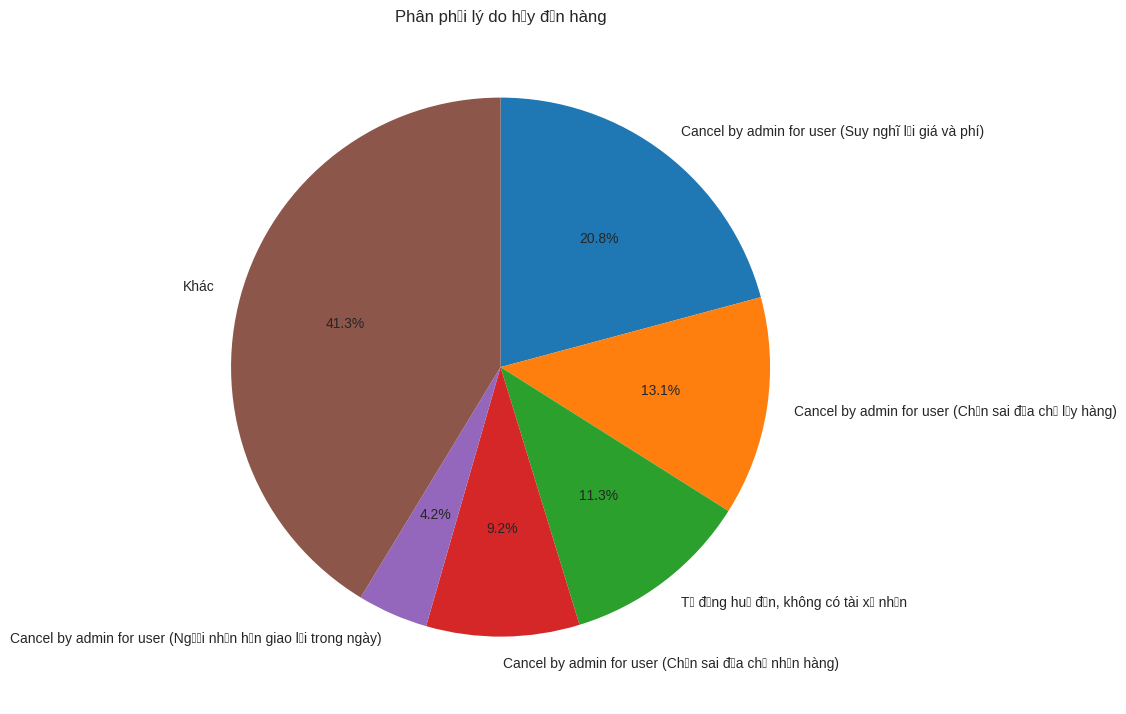

In [ ]:
# Sắp xếp dữ liệu theo tổng số đơn hàng bị hủy và chọn 5 lý do có tỷ lệ lớn nhất
top_5_reasons = cancelled_by_reason.nlargest(5, 'total_cancelled')


# Tính tổng số hủy của các lý do còn lại và nhóm vào mục 'Khác'
other_reason = cancelled_by_reason.loc[~cancelled_by_reason['ly_do_huy'].isin(top_5_reasons['ly_do_huy'])]
other_total = other_reason['total_cancelled'].sum()


# Tạo một DataFrame mới cho mục 'Khác'
other_df = pd.DataFrame({'ly_do_huy': ['Khác'], 'total_cancelled': [other_total]})


# Kết hợp top 5 lý do với mục 'Khác'
top_5_reasons = pd.concat([top_5_reasons, other_df], ignore_index=True)


# Vẽ biểu đồ tròn cho 5 lý do có tỷ lệ lớn nhất cộng với mục 'Khác'
plt.figure(figsize=(10, 8))
plt.pie(top_5_reasons["total_cancelled"], labels=top_5_reasons["ly_do_huy"],
        autopct="%1.1f%%", startangle=90, counterclock=False, textprops={"fontsize": 10})
plt.title("Phân phối lý do hủy đơn hàng")
plt.tight_layout()
plt.show()

**Nhận xét biểu đồ: Phân phối lý do huỷ đơn hàng**

- Biểu đồ tròn thể hiện phân phối các lý do huỷ đơn hàng, với nhiều nguyên nhân khác nhau đến từ phía người dùng, hệ thống hoặc các yếu tố khách quan. Dễ dàng nhận thấy phần lớn đơn hàng bị huỷ rơi vào nhóm **"Khác"**, chiếm tới **41.3%**, cho thấy có nhiều tình huống không được phân loại rõ ràng – đây là một điểm cần lưu ý trong quá trình chuẩn hoá và phân tích dữ liệu về sau.

- Đứng thứ hai là nhóm **“Suy nghĩ lại giá và phí”**, chiếm **20.8%**, phản ánh yếu tố chi phí vẫn là trở ngại lớn đối với người dùng trong việc quyết định đặt hàng. Ngoài ra, hai lý do phổ biến khác là **“Chọn sai địa chỉ lấy hàng” (13.1%)** và **“Không có tài xế nhận đơn” (11.3%)**, cho thấy tồn tại lỗi thao tác từ phía người dùng và tình trạng thiếu tài xế ở một số khung giờ hoặc khu vực.

- Các lý do ít gặp hơn như **“Chọn sai địa chỉ nhận hàng” (9.2%)** và **“Người nhận hẹn giao lại trong ngày” (4.2%)** tuy chiếm tỷ lệ nhỏ nhưng vẫn cần được theo dõi để cải thiện quy trình và trải nghiệm khách hàng.

<ipython-input-131-6755fee67cec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_driver_cost", y="ly_do_huy", data=top10_reasons, palette="viridis")
<ipython-input-131-6755fee67cec>:6: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-131-6755fee67cec>:6: UserWarning: Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-131-6755fee67cec>:6: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-131-6755fee67cec>:6: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-131

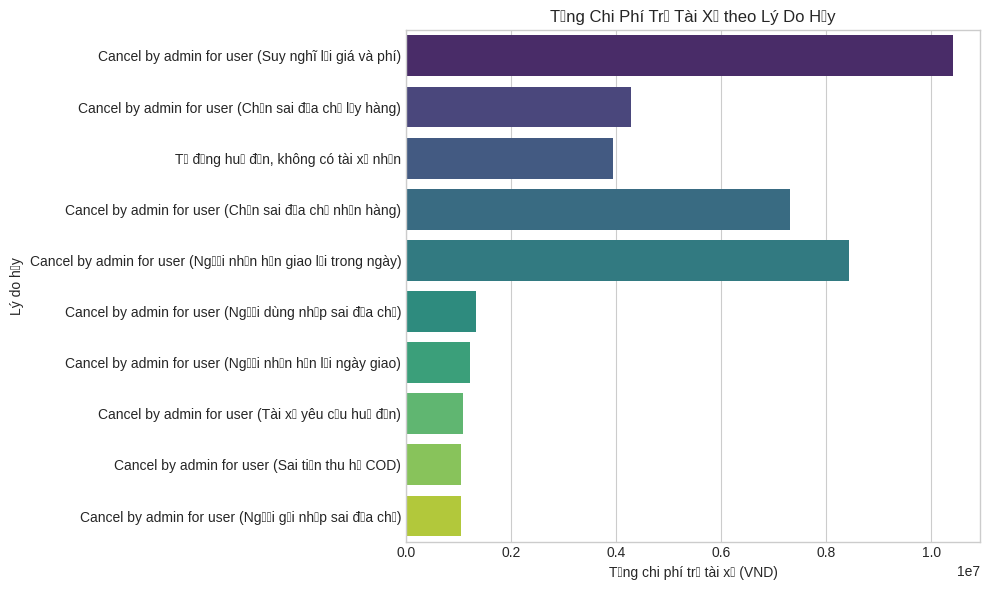

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="total_driver_cost", y="ly_do_huy", data=top10_reasons, palette="viridis")
plt.title("Tổng Chi Phí Trả Tài Xế theo Lý Do Hủy")
plt.xlabel("Tổng chi phí trả tài xế (VND)")
plt.ylabel("Lý do hủy")
plt.tight_layout()
plt.show()

**Nhận xét**
- Biểu đồ cho thấy sự khác biệt rõ rệt về chi phí trả tài xế giữa các lý do hủy đơn:

- Lý do "Suy nghĩ lại giá và phí" có chi phí trả tài xế cao nhất, cho thấy việc thay đổi quyết định về giá hoặc phí giao hàng gây ảnh hưởng tài chính lớn cho công ty.

- Các lý do như "Chọn sai địa chỉ" dẫn đến chi phí cao, vì phải điều phối lại tài xế hoặc hủy đơn.

- Các lý do như "Sai địa chỉ thu hộ COD" hay "Người gửi nhập sai địa chỉ" tạo ra chi phí thấp hơn nhưng vẫn tạo một số chi phí cho tài xế.

**Kết luận**
- Tự động hủy đơn là lý do có chi phí thấp nhất, vì không có tài xế tham gia vào quá trình giao hàng.

- Những lý do liên quan đến yêu cầu của khách hàng, như "Yêu cầu hủy đơn" hoặc "Người nhận hẹn lại ngày giao", tạo ra mức chi phí trung bình.

**Đề xuất**
- Để giảm chi phí trả tài xế, công ty nên tập trung vào việc giảm tỷ lệ thay đổi địa chỉ và cải thiện quy trình giao hàng, nhằm hạn chế các lý do hủy đơn gây phát sinh chi phí không cần thiết.

# **3. Xây dựng mô hình dự đoán**

## **3.1. Dự đoán thời gian từ lúc tạo đơn đến lúc hoàn thành (Thời gian hoàn thành đơn - Thời điểm tạo đơn) hoặc phân tích xu hướng thời gian giao hàng theo thời gian**

              precision    recall  f1-score   support

      ĐÃ HUỶ       0.05      0.47      0.09       359
  HOÀN THÀNH       0.99      0.83      0.90     18989

    accuracy                           0.82     19348
   macro avg       0.52      0.65      0.49     19348
weighted avg       0.97      0.82      0.89     19348



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7926 (\N{LATIN CAPITAL LETTER Y WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


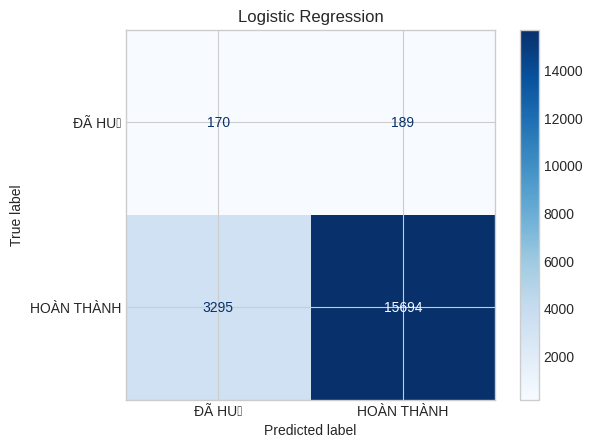

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def clean_range(value):
    try:
        if isinstance(value, str) and '-' in value:
            # Nếu giá trị là dạng chuỗi như '100k-500k', lấy giá trị trung bình
            low, high = value.split('-')
            low = int(low.replace('k', '').strip()) * 1000  # Chuyển 'k' thành hàng nghìn
            high = int(high.replace('k', '').strip()) * 1000
            return (low + high) / 2  # Giá trị trung bình
        elif isinstance(value, str):
            # Nếu là chuỗi số đơn giản (không phải dải giá trị)
            return float(value.replace('k', '').strip()) * 1000  # Chuyển 'k' thành hàng nghìn
        else:
            return float(value)  # Nếu đã là số, trả lại giá trị số
    except:
        return np.nan  # Nếu không thể chuyển đổi, trả về NaN

# Chỉ lấy các dòng có trạng thái là HOÀN THÀNH hoặc ĐÃ HUỶ
valid_statuses = ["HOÀN THÀNH", "ĐÃ HUỶ"]
df_filtered = df[
    (df["trạng_thái_đơn"].isin(valid_statuses)) |
    (df["trang_thai_chuyến"].isin(valid_statuses))
].copy()

# Tạo cột trạng thái chung
df_filtered["trạng_thái"] = df_filtered["trạng_thái_đơn"]
df_filtered.loc[df_filtered["trạng_thái"].isna(), "trạng_thái"] = df_filtered["trang_thai_chuyến"]
df_filtered["labels"] = df_filtered["trạng_thái"].map({"HOÀN THÀNH": 1, "ĐÃ HUỶ": 0})
df_filtered = df_filtered[df_filtered["labels"].notna()]

# Làm sạch các cột có dấu phẩy (giá trị tiền tệ)
def clean_currency(x):
    try:
        return float(str(x).replace(",", "").strip())
    except:
        return x

# Kiểm tra và chuyển đổi toàn bộ các cột kiểu chuỗi thành chuỗi, sau đó áp dụng .str.contains
for col in df_filtered.select_dtypes(include='object').columns:
    # Sử dụng .loc[] để tránh SettingWithCopyWarning
    df_filtered.loc[:, col] = df_filtered[col].astype(str)

    # Kiểm tra nếu có dấu phẩy trong chuỗi và làm sạch
    if df_filtered[col].str.contains(",", na=False).any():
        df_filtered.loc[:, col] = df_filtered[col].apply(clean_currency)

    # Làm sạch các giá trị kiểu "100k-500k"
    df_filtered.loc[:, col] = df_filtered[col].apply(clean_range)

# Bỏ các cột không cần thiết
drop_cols = [
    'SĐT người tạo đơn', 'Người tạo đơn', 'Mã chuyến', 'Mã đơn hàng',
    'Địa chỉ lấy hàng', 'Địa chỉ khách', 'Địa chỉ chi tiết', 'Ghi chú',
    'Tài xế', 'tracking_link', 'ly_do_huy', 'pod', 'por',
    'Thời gian hoàn thành đơn', 'Thời gian giao hàng', 'Ngày', 'Giờ',
    'Thời gian tài xế nhận đơn', 'Thời điểm tạo đơn', 'Thời điểm tài xế lấy hàng', 'order_value_group','avg_delivery_cost_per_trip',
]
X = df_filtered.drop(columns=drop_cols, errors='ignore')
y = df_filtered["labels"]

# Kiểm tra lại kiểu dữ liệu các cột
for col in X.select_dtypes(include='object').columns:
    # Kiểm tra nếu cột chứa sự kết hợp giữa float và str
    if X[col].apply(lambda x: isinstance(x, str)).any() and X[col].apply(lambda x: isinstance(x, float)).any():
        # Chuyển đổi tất cả giá trị thành chuỗi
        X[col] = X[col].astype(str)

# Chuyển các cột có kiểu chuỗi thành số (sử dụng LabelEncoder)
for col in X.select_dtypes(include='object').columns:
    # Mã hóa các giá trị phân loại thành số
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Bỏ cột datetime (gây lỗi mô hình)
datetime_cols = X.select_dtypes(include=["datetime64[ns]"]).columns
X = X.drop(columns=datetime_cols)
# Chuyển các cột kiểu Categorical thành kiểu object để xử lý với fillna
for col in X.select_dtypes(include='category').columns:
    X[col] = X[col].astype('object')
# Xoá dòng còn thiếu (NaN)
X = X.fillna(0)
y = y.fillna(0)

# --- B2: Chia dữ liệu ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["ĐÃ HUỶ", "HOÀN THÀNH"]))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ĐÃ HUỶ", "HOÀN THÀNH"])
disp.plot(cmap='Blues')
plt.title("Logistic Regression")
plt.show()


In [ ]:
# Kiểm tra lại các cột còn lại
print(df.columns)

Index(['SĐT người tạo đơn', 'Người tạo đơn', 'Siêu thị', 'Khu vực',
       'Mã chuyến', 'Ngày tạo đơn', 'Mã đơn hàng', 'Giá trị đơn hàng',
       'Địa chỉ lấy hàng', 'Địa chỉ khách', 'Địa chỉ chi tiết', 'Ghi chú',
       'Tài xế', 'SĐT', 'km đơn', 'km chuyến', 'Mã dịch vụ', 'trạng_thái_đơn',
       'trang_thai_chuyến', 'ly_do_huy', 'Đơn ưu tiên', 'Hạng thành viên',
       'Phí vượt km', 'Phụ phí thu khách', 'Mô tả phụ phí KH',
       'Tổng phí thu khách', 'Thu hộ COD', 'Tổng thu khách hàng',
       'Phụ phí trả tài xế', 'Mô tả phụ phí TX', 'Số chuyến', 'Đơn giá chuyến',
       'Phí chuyến cho tài', 'Tổng phí trả tài xế', 'Thời điểm tạo đơn',
       'Thời điểm tài xế nhận đơn', 'Thời điểm tài xế lấy hàng',
       'Thời gian hoàn thành đơn', 'pod', 'por', 'tracking_link', 'sdt_khach',
       'Thời gian giao hàng', 'Ngày', 'Giờ', 'avg_delivery_cost_per_trip',
       'order_value_group', 'Thời gian giao phút', 'is_cancelled'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 78

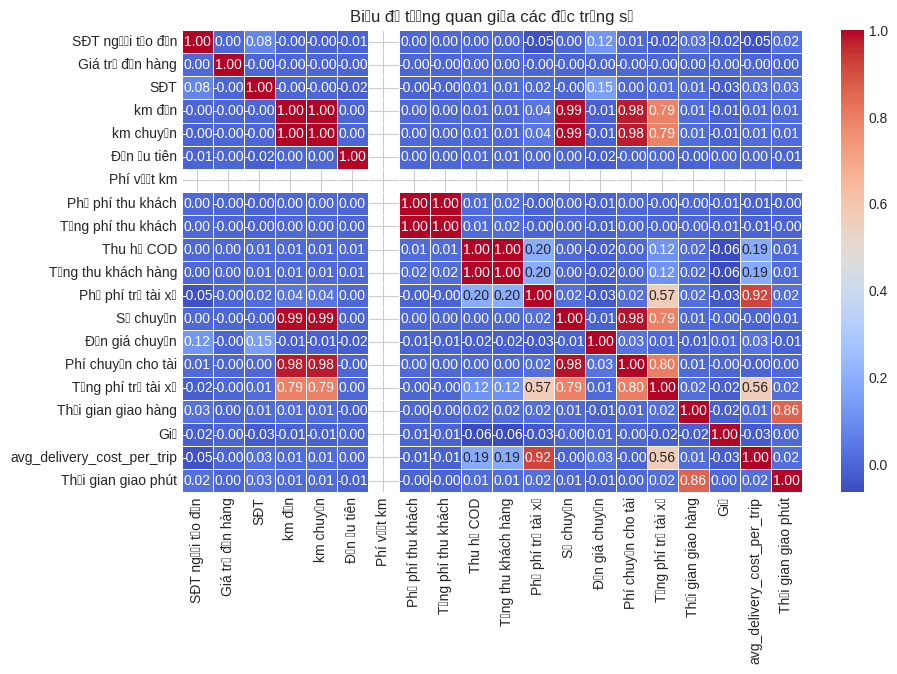

In [ ]:
df_numeric = df.select_dtypes(include=['number'])


# Vẽ lại biểu đồ tương quan chỉ với các cột số
plt.figure(figsize=(10, 6))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Biểu đồ tương quan giữa các đặc trưng số')
plt.show()



## **3.2. Dự đoán Tổng phí trả tài xế dựa trên các đặc trưng như khoảng cách, thời gian, km**


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
# Chọn đặc trưng và mục tiêu
X = df[['km đơn', 'km chuyến', 'Số chuyến', 'Phụ phí trả tài xế', 'Phí chuyến cho tài']]  # Các đặc trưng
y = df['Tổng phí trả tài xế']  # Mục tiêu: Phí trả tài xế

# Loại bỏ các dòng có giá trị NaN trong cả X và y
df_cleaned = df.dropna(subset=['Tổng phí trả tài xế', 'km đơn', 'km chuyến', 'Số chuyến', 'Phụ phí trả tài xế', 'Phí chuyến cho tài'])

# Tạo lại X và y sau khi loại bỏ NaN
X = df_cleaned[['km đơn', 'km chuyến', 'Số chuyến', 'Phụ phí trả tài xế', 'Phí chuyến cho tài']]
y = df_cleaned['Tổng phí trả tài xế']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# In kết quả đánh giá
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")


R²: 0.9640
MAE: 620.21


 R2 = 0.9640: Mô hình có khả năng giải thích khoảng 96.4% phương sai của dữ liệu.

● MAE = 620.21: Giá trị MAE cho thấy trung bình mỗi dự đoán lệch khoảng 620.21
đơn vị so với giá trị thực.

**Nhận xét:**

● Hiệu quả của mô hình:

○ Với R2 = 0.9640, mô hình có khả năng giải thích hơn 90% phương sai trong
Tổng phí trả tài xế, cho thấy mô hình hoạt động rất tốt trong việc dự đoán và
rất phù hợp với dữ liệu.

○ MAE = 620.21 cho thấy độ lệch giữa giá trị thực và giá trị dự đoán là khoảng
620.21 đơn vị, đây là mức độ sai lệch có thể chấp nhận được trong nhiều bài

toán, nhưng nếu muốn cải thiện chính xác hơn, vẫn có không gian để tối ưu
hóa mô hình.

**● Ưu điểm:**

● Mô hình đang hoạt động rất hiệu quả với R2 cao, điều này chứng tỏ mô hình
có khả năng giải thích biến động của dữ liệu rất tốt.

● MAE ở mức chấp nhận được, cho thấy mô hình có độ chính xác khá tốt. Tuy
nhiên, nếu yêu cầu về độ chính xác trong môi trường ứng dụng thực tế là cao,
có thể cần tối ưu thêm để giảm sai lệch giữa giá trị thực tế và dự đoán

Kết luận: Mô hình Random Forest Regressor đã hoạt động rất tốt với hiệu suất cao, đạt R2
= 0.9640, cho thấy mô hình có khả năng giải thích phần lớn sự biến động trong Tổng phí trả
tài xế. Tuy nhiên, MAE = 620.21 cho thấy độ lệch giữa giá trị thực tế và dự đoán còn có thể
cải thiện. Mặc dù vậy, với kết quả R2 ấn tượng, mô hình vẫn có khả năng dự đoán chính xác
cho Tổng phí trả tài xế, giúp tối ưu hóa các quyết định trong quy trình phân bổ chi phí tài
xế.